## Исследование данных о российском кинопрокате



**Название проекта:**

Исследование данных о российском кинопрокате
_____
**Описание исследования:**

В данном исследовании необходимо изучить рынок российского кинопроката 
_____
**Цель исследования:**

Выявить текущие тренды.
_____
**Задача исследования:**

Изучить насколько фильмы, получившие государственную поддержку интересны зрителю
_____
**Исходные данные:**
    
В качестве материала для анализа были получены два файла, содержащих данные, опубликованные на портале открытых данных Министерства культуры, а также информацию с сайта КиноПоиск
______

**Данное исследование разделим на несколько частей:**

Работа над данным проектом была разделена на 4 шага:
1) изучение общей информации;\
2) предобработка данных;\
3) добавление новых параметров;\
4) исследовательский анализ данных.
_________________

</div>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data_movies = pd.read_csv ('/datasets/mkrf_movies.csv', parse_dates = ['show_start_date'])
data_shows = pd.read_csv ('/datasets/mkrf_shows.csv')

In [3]:
print (data_movies.info())
data_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
print (data_shows.info())
data_shows.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
data_movies [data_movies ['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_movies ['puNumber'] = pd.to_numeric(data_movies ['puNumber'], errors='coerce')

In [7]:
data_full = data_movies.merge(data_shows, on = 'puNumber', how = 'left')

In [8]:
data_full.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data_full [data_full['box_office'] > 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2.700000e+03
18,Неподдающиеся,111003616.0,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",3.600000e+02
19,Неподсуден,111003716.0,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,4.200000e+02
22,"Операция ""Ы"" и другие приключения Шурика",111007413.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",3.800000e+02
38,Мужики!..,111007213.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1.165000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019.0,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7471,Реальная любовь в Нью-Йорке,121038219.0,2019-12-19 12:00:00+00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,3.143790e+06
7472,Черное Рождество,121038319.0,2019-12-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив",1.800177e+07


In [10]:
data_full['show_start_date'] = pd.to_datetime (data_full['show_start_date'].dt.date, format='%Y-%m-%dT')

In [11]:
data_full['show_start_date'].head(1)

0   2015-11-27
Name: show_start_date, dtype: datetime64[ns]

In [12]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7485 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [13]:
data_full.columns 

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [14]:
data_full.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [15]:
data_full.duplicated().sum()

0

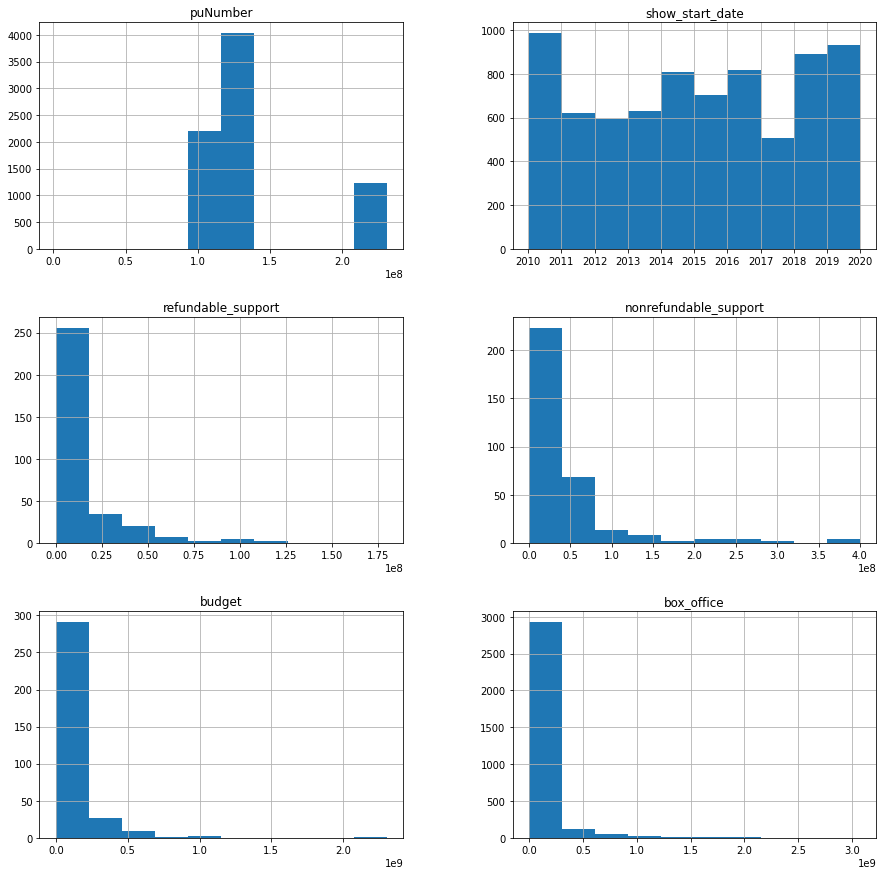

In [16]:
data_full.hist(figsize = (15, 15))
plt.show()

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** \
\
На данном этапе были открыты файлы с данными, затем они были соединены в один датасет 'data_full'. Далее была изучена общая информация по нему для возможности приступить к дальнейшим шагам работы.
    
В датасете 'data_full' находяться 16 (шестнадцать) столбцов, содержащих следующие данные:
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма;
- box_office — сборы в рублях.
    
В столбце 'show_start_date' было отсечено время премьеры фильма, так как оно не несет в себе нужной для исследования информации, а лишь только утяжеляет прочтение хранящихся там данных.
    
Было обнаружено что, столбцы 'puNumber' и 'ratings' - имеют неправильный тип данных, что может отразиться на будущих результатах. Опираясь на данное предположение, на следущем этапе данный столбцы будут заново проанализирован для устранения такого рода ошибок.
    
При анализе заголовков столбцов не было выявлено никаких замечаний, которые должны подвергнуться дополнительному анализу.

Однако, было обаружено, что в 11 (одинадцати) следующих столбцах: 'film_studio', 'production_country', 'director', 'producer', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'genres', 'box_office' - присутсвуют пропущенные значения, они будут также более подробно изучены и устранены по возможности на следующем этапе работы. 
    
Кроме того, при построении гистограмм каждого показателя и предварительном анализе их распределений, возникли сомнения по поводу хранящихся там аномальных значений, что будет более тщательно рассмотрено в последущих этапах работы над проектом. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

In [17]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7485 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [18]:
data_full[data_full['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data_full = data_full.dropna(subset = ['puNumber'], axis = 0)
data_full = data_full.reset_index(drop = True)

In [20]:
data_full[data_full['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [21]:
data_full['puNumber'] = data_full['puNumber'].astype('int')

In [22]:
data_full['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [23]:
data_full ['ratings'] = pd.to_numeric (data_full ['ratings'], errors='coerce')

In [24]:
data_full['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [25]:
def rating_norm (rating):
    if rating > 10:
        return rating/100
    if rating < 10:
        return rating
    
data_full ['ratings'] = data_full ['ratings'].apply(rating_norm)

In [26]:
data_movies = pd.read_csv ('/datasets/mkrf_movies.csv', parse_dates = ['show_start_date'])

In [27]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [28]:
data_movies['ratings'] = pd.to_numeric(data_movies['ratings'], errors= 'coerce')

In [29]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [30]:
data_movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [31]:
data_full.dtypes

title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
Типы данных были изменены в 2 (двух) столбцах из 16 (шестнадцати) в таблице. Данные изменения обусловлены корректностью анализа в последующих шагах работы, так как неправильно указанный тип данных может повлиять на выполнение кода в целом или на правдивость его результата. Стоит так же пояснить, что это негрубая ошибка в данных, которая легко поддается исправлению и чаще всего возникающая на этапе сбора данных.
    
Таким образом, типы данных были скорректированы следующим образом: 
1) столбец 'show_start_date' с датой премьеры фильма - с object (тип данных для текста) на datetime64[ns] (тип данных для даты);\
2) столбец 'ratings' с рейтингом фильма на КиноПоиске - с object (тип данных для текста) на float64 (тип данных для дробных).

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [32]:
data_full.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

In [33]:
data_full[data_full['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6484,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_full['film_studio'] = data_full['film_studio'].fillna('Не указано')

**Пояснение:**

Столбец 'film_studio', содержащий наименования студий-производителей, был повторно обработан на содержание в нем пропущенных значений.

Так, 18 (восемнадцать) таких значений были заменены на фразу 'Не указано'. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно.

Таким образом, замена пропущенных значений на 'Не указано' даст возможность идентифицировать в дальнейшем такие значения, а также объединить их в одну группу для более точных и достоверных рассчетов.

In [35]:
data_full [data_full['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Не указано,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [36]:
data_full['production_country'] = data_full['production_country'].fillna ('Россия')

**Пояснение:**


Столбец 'production_country', содержащий информацию о странах-производителях фильмов, был повторно обработан на содержание в нем пропущенных значений.

Так, 2 (двое) таких значений были заменены на страну 'Россия'. Данные пропуски появились в результате какой-либо автоматической ошибки или упущения при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно. Однако, их малое количество дало возможность прибегнуть к поиску стран-производителей самостоятельно.

Таким образом, замена пропущенных значений на 'Россия' даст возможность в дальнейшем объединить их в группу с другими данными по стране для более точных и достоверных рассчетов.

In [37]:
data_full [data_full['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Не указано,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [38]:
data_full['director'] = data_full['director'].fillna('Не указано')

**Пояснение:**

Столбец 'director', содержащий имена режиссёров, был повторно обработан на содержание в нем пропущенных значений.

Так, 9 (девять) таких значений были заменены на фразу 'Не указано'. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно.

Таким образом, замена пропущенных значений на 'Не указано' даст возможность идентифицировать в дальнейшем такие значения, а также объединить их в одну группу для более точных и достоверных рассчетов.

In [39]:
data_full [data_full['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,Отряд специального назначения,111020419,2019-12-01,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7405,Назначаешься внучкой,111020519,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7406,Перед рассветом,111020619,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7407,Ты помнишь,111020719,2019-12-01,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


In [40]:
data_full['producer'] = data_full['producer'].fillna('Не указано')

**Пояснение:**

Столбец 'producer', содержащий имена продюсер кинолент, был повторно обработан на содержание в нем пропущенных значений.

Так, 568 (пятьсот шестьдесят восемь) таких значений были заменены на фразу 'Не указано'. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно.

Таким образом, замена пропущенных значений на 'Не указано' даст возможность идентифицировать в дальнейшем такие значения, а также объединить их в одну группу для более точных и достоверных рассчетов.

In [41]:
data_full [data_full['refundable_support'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data_full [data_full['nonrefundable_support'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data_full [data_full['budget'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Пояснение:**

Столбцы 'refundable_support', 'nonrefundable_support' и 'budget', содержащие объём возвратных средств государственной поддержки, объём невозвратных средств государственной поддержки и общий бюджет фильма соответсвенно, были повторно обработаны на содержание в них пропущенных значений.

Так, все 21462 таких значений (по 7154 в каждом) не были заменены ни на какое другое значение. Данное решение было принято во многом по причине того, что изначально большинство данных могли быть не указаны из-за отсутствия финансирования со стороны России таких кинолент, из чего следует, что заменить их на среднее или другие значения невозможно и не несет в себе выгоды для расчетов по данному проекту.

Таким образом, пропущенные значения были оставлены без изменений, что даст возможность идентифицировать их в дальнейшем для более точных и достоверных рассчетов.

In [44]:
data_full [data_full['financing_source'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data_full['financing_source'] = data_full['financing_source'].fillna('Не указано')

**Пояснение:**

Столбец 'financing_source', содержащий источники государственного финансирования, был повторно обработан на содержание в нем пропущенных значений.

Так, такие значения были заменены на фразу 'Не указано'. Данное решение было принято по причине того, что данные пропуски появились в результате отсутсвия поддержки России данным фильмам в виде выделения гос. средств, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно.

Таким образом, замена пропущенных значений на 'Не указано' даст возможность идентифицировать в дальнейшем такие значения, а также объединить их в одну группу для более точных и достоверных рассчетов.

In [46]:
print(data_full [data_full['ratings'].isna()])
data_full['ratings'].isna().sum()

                                                 title   puNumber  \
43            Мемуары гейши (по роману Артура Голдена)  121000606   
150                                           Жди меня  111013615   
154   Дом из песка и тумана (по книге Андре Дюбуи III)  221037813   
159                                  Жемчужная девушка  224011014   
227                                         Полустанок  111026714   
...                                                ...        ...   
7478                                            Эколав  111023219   
7479                   Акрам Хан: Родом из Карри Хауса  126007919   
7480         Сад художника: Американский импрессионизм  126008019   
7482         Щенячий патруль: Скорей спешим на помощь!  124010819   
7483          Машины песенки. Серия "Испанские мотивы"  124010619   

     show_start_date             type  \
43        2012-12-14   Художественный   
150       2015-08-25   Художественный   
154       2013-10-25   Художественный   
159    

995

**Пояснение:**

Столбец 'ratings', содержащий рейтинги фильмов на КиноПоиске, был повторно обработан на содержание в нем пропущенных значений.

Так, 29 таких значений не были заменены ни на какое другое значение. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на среднее или другие значения невозможно. Более того, рейтинг того или иного фильма нельзя предугадать, так как он зависет от предпочтения людей.

Таким образом, пропущенные значения были оставлены без изменений, что даст возможность идентифицировать их в дальнейшем, а также проводить с ними различные вычисления для более точных и достоверных рассчетов.

In [47]:
data_full [data_full['genres'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Не указано,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Не указано,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,Эколав,111023219,2019-12-26,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,NaN,219569.0
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,NaN,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,NaN,NaN


In [48]:
data_full['genres'] = data_full['genres'].fillna('Не указано')

**Пояснение:**

Столбец 'genres', содержащий жанры кинолент, был повторно обработан на содержание в нем пропущенных значений.

Так, пропущенные значений были заменены на фразу 'Не указано'. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на наиболее распространенные или другие наименования студий невозможно.

Таким образом, замена пропущенных значений на 'Не указано' даст возможность идентифицировать в дальнейшем такие значения, а также объединить их в одну группу для более точных и достоверных рассчетов.

In [49]:
data_full [data_full['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,Не указано,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,Не указано,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,Не указано,NaN


**Пояснение:**

Столбец 'box_office', содержащий объём сборов кинолент в рублях, был повторно обработан на содержание в нем пропущенных значений.

Так, 4328 таких значений не были заменены ни на какое другое значение. Данное решение было принято во многом по причине того, что изначально большинство данных могли быть не указаны из-за отсутствия финансирования со стороны России таких кинолент, из чего следует, что заменить их на среднее или другие значения невозможно и не несет в себе выгоды для расчетов по данному проекту.

Таким образом, пропущенные значения были оставлены без изменений, что даст возможность идентифицировать их в дальнейшем для более точных и достоверных рассчетов.

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** 
 
Пропуски были обнаружены в 12 (двенадцати) столбцах из 16 (шестнадцати) в таблице. 

Причины появления пропусков в категориальных данных могут быть объяснены как ошибкой сервиса или его некорректной работой, ошибками при сборе данных, а также специальным пропуском данного поля, как, например, в столбце financing_source - это может означать означает отсутствие гос.средств России в бюджете. Тем не менее, такие пропуски были заменены на фразу 'Не указано' в каждом столбце по смыслу для удобства продолжения дальнейшей работы над ними.

Однако, пропущенные значения почти во всех количественных данных, в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'box_office', и причина их возникновения - большинство данных могли быть не указаны из-за отсутствия финансирования со стороны России таких кинолент, из чего следует, что заменить их на среднее или другие значения невозможно и не несет в себе выгоды для расчетов по данному проекту.

Пропущенные значения в столбце 'ratings' не были заменены ни на какое другое значение. Данное решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на среднее или другие значения невозможно. Более того, рейтинг того или иного фильма нельзя предугадать, так как он зависет от предпочтения людей.
    
Более того, стоит отметить что пропуски в столбцах 'refundable_support' и 'nonrefundable_support' будут обработаны повторно по отношению к столбцу 'budget', так как, согласно инструкциям к изначальным данным, в последнем указывается информация, если у фильма была поддержка от государства. Таким образом, будут востановлены данные там где это возможно для российских кинолент, получивших заемные средства от государства.

#### Шаг 2.3. Изучите дубликаты в датафрейме

In [50]:
data_full.duplicated().sum()

0

In [51]:
data_full.nunique()

title                    6771
puNumber                 7483
show_start_date          1964
type                        8
film_studio              5491
production_country        950
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    80
genres                    743
box_office               2938
dtype: int64

**Пояснение:**

Была проанилизирована вся таблица на предмет наличия в ней явных (полностью идентичных) дибликатов данных. А также был получен список с уникальными значениями по каждому столбцу отдельно, на котором видно, что такое число в каждом столбце разное и не равно общему количеству.

Так, согласно вычислениям таких данных в таблице нет. Разбор уникальных значений каждого стобца будет произведен ниже.

#### Шаг 2.4. Изучите категориальные значения

In [52]:
data_full.dtypes

title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

In [53]:
data_full [data_full.duplicated(['puNumber'], keep = False)]   

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,6.8,"комедия,криминал",NaN


**Пояснение:**

Столбец 'puNumber' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Было обнаружено, что в данном столбце присутсвуют 2 пары дубликатов: причина появления обеих - возможная ошибка при сборе данных, так как номера удостоверений одинаковые, а названия фильмов разные, беря во внимание, что номер удостоверения для работы над проектом не так важен, было принято решение оставить обе пару без изменений.

In [54]:
data_full['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [55]:
data_full [data_full.duplicated(['title'], keep = False)]             

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.5,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"триллер,криминал,детектив",NaN


In [56]:
data_full [data_full['title'].str.contains('Гарри Поттер')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.7,"фэнтези,приключения,семейный",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.7,"фэнтези,приключения,семейный",759526.0
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,8.0,"фэнтези,приключения,семейный",1093810.0
112,Гарри Поттер и узник Азкабана /По роману Дж.К....,221005016,2016-02-09,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,8.2,"фэнтези,приключения,семейный",NaN
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,8.2,"фэнтези,приключения,семейный",1125302.0
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,8.2,"фэнтези,приключения,семейный",1948760.0
121,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,221004816,2016-02-09,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.9,"фэнтези,приключения,семейный",NaN
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.9,"фэнтези,приключения,семейный",843310.0
337,Гарри Поттер и Принц-полукровка /По роману Дж....,121026416,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,Дэйвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,7.7,"фэнтези,приключения,семейный",883640.0
371,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121026516,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,8.1,"фэнтези,драма,детектив",745510.0


**Пояснение:**

Столбец 'title' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся наименования фильмов - следствие, например, получения разными кинотеатрами лецензий на один и тот же фильм.

In [57]:
data_full['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [58]:
data_full ['type'] = data_full ['type'].str.strip()

**Пояснение:**

Столбец 'type' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся типы фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам. Также были обнаружены ошибки в написании некоторых типов (лишние пробелы в начале или в конце строки), которые были устранены. 

In [59]:
data_full['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [60]:
data_full ['film_studio'] = data_full ['film_studio'].str.strip()

**Пояснение:**

Столбец 'film_studio' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся студии-производители фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам. Также были обнаружены ошибки в написании некоторых студий (лишние пробелы в начале или в конце строки), которые были устранены. 

In [61]:
print (data_full['production_country'].unique())
data_full['production_country'].nunique()

['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия, Казахстан, США' 'СССР, Швеция'
 'СССР, Франция, Англия, Куба, ГДР' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Чехия' 'Кан

950

In [62]:
data_full = data_full [data_full['production_country'] != '2019']

In [63]:
data_full ['production_country'] = data_full ['production_country'].str.strip()

In [64]:
data_full ['production_country'] = (
    data_full ['production_country']
    .str.replace(', ', '-')
    .str.replace(' - ', '-')
    .str.replace(',', '-')
    .str.replace(' ,', '-')
    .str.replace('- ', '-')
    .str.replace(' -', '-')
    .str.replace(' , ', '-')
    .replace(['Республика Корея', 'Ю.Корея'], ['Южная Корея', 'Южная Корея'], regex=True)
    .replace(['Республика Кипр', 'Н.Зеландия', 'КНР', 'К;анада', 'ФРГ', 'Республика Казахстан'],\
             ['Кипр', 'Новая Зеландия', 'Китай', 'Канада', 'Германия', 'Казахстан'], regex=True)
    .replace (['CША', 'Сша', 'СЩА'], ['США', 'США', 'США'], regex=True)
    .replace (['ПНР'], ['Польша'], regex=True)
)
data_full ['production_country'].nunique()

796

In [65]:
# check
data_full ['production_country'].tail()

7480    Великобритания
7481               США
7482        США-Канада
7483       Кипр-Россия
7484       Кипр-Россия
Name: production_country, dtype: object

**Пояснение:**

Столбец 'production_country' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся страны-производители фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам. Также были обнаружены ошибки в написании некоторых стран (применения сокращений, различных названий или различного регистра) и лишние пробелы в начале или в конце строки: все подобные проблемы были устранены. 

In [66]:
data_full['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

**Пояснение:**

Столбец 'director' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся режиссеры фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам.

In [67]:
data_full['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'Не указано',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

**Пояснение:**

Столбец 'producer' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся продюсеры фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам.

In [68]:
data_full['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

**Пояснение:**

Столбец 'age_restriction' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся возрастные ограничения фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам.

In [69]:
data_full['financing_source'].unique()

array(['Не указано', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**Пояснение:**

Столбец 'financing_source' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся источники государственного финансирования фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам.

In [70]:
data_full['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Не указано', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

**Пояснение:**

Столбец 'genres' был обработан на присутствие в нем явных или неявных дубликатов, ориентируясь на список уникальных значений в нем.

Таким образом, можно сделать вывод, что дубликатов в данных столбца нет. Повторяющиеся жанры фильмов - следствие заранее ограниченного списка такой характеристики кинолент, которая применялась ко всем картинам.

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** 

На данном этапе предобработки данных не было обнаружено явных дубликатов, то есть совершенно идентичных показателей. Однако, при рассмотрении отдельных списков уникальных значений в каждом столбце были выявлены неявные дубликаты. Такими дабликатами являются, к примеру, в столбце 'production_country' различные написания страны, как 'Юж. Корея' и 'Южная Корея'. Такие неявные дубликаты устранимы и появляются по причине того, что заполнение таких данных происходило неавтоматизировано. Во избежание такого рода ошибок рекомендуется рассмотреть внедрение выплывающих списков для таких данных. 
    
В столбце 'puNumber' были обнаружены дубликаты номеров удостоверений, но, так как для работы над проектом такие номера не играют важной роли, было принято решение оставить их без изменений.
    
Также следует отметить, что в столбцах 'film_studio', 'type' и 'production_country' были обнаружены в написани илишние пробелы в начале или в конце строки, которые были устранены. Остальные данные были оставлены без именений в виду отсутсвия замечаний к ним.
    
Таким образом, основной проблемой категориальных данных в датасете является их многочисленность в каждом отдельном значении, по причине чего сложно выделить какую-либо основную категорию или линию для отслеживания, то есть усложняется их прочтение и интерпретация. Например, написание всех жанров, к которым относится тот или иной фильм, а также повторение наименований фильмов из-за разнах прокатных удостоверений "делит" статистику по каждому.

#### Шаг 2.5. Проверьте количественные значения

In [71]:
data_full.dtypes

title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

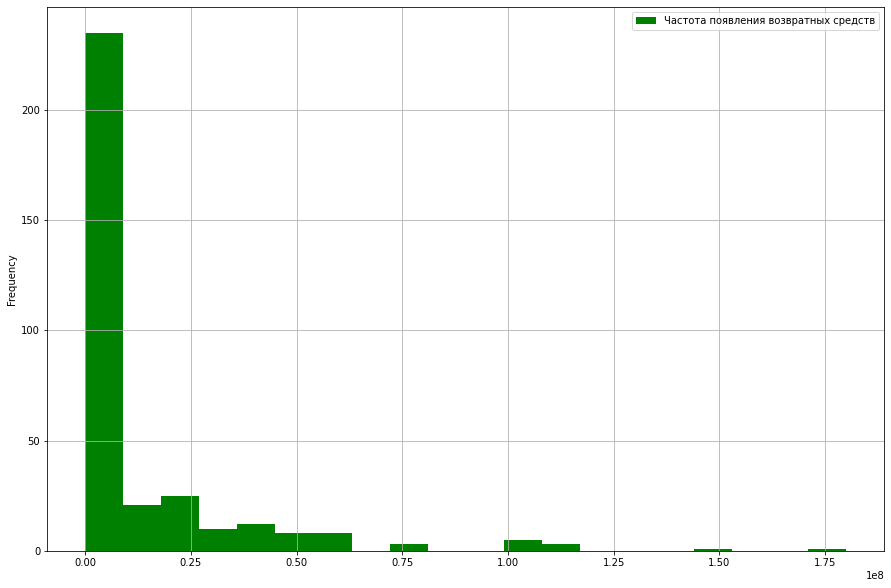

In [72]:
data_full['refundable_support'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'green', \
                        label ='Частота появления возвратных средств', legend = 'reverse', bins = 20)

In [73]:
data_full['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

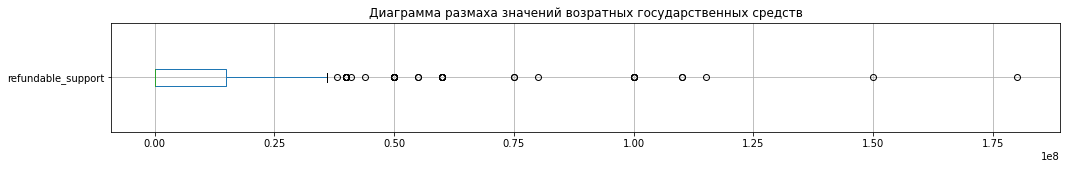

In [74]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_full[['refundable_support']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений возратных государственных средств');

In [75]:
data_full['refundable_support'].isna().mean()*100

95.56386958845538

**Пояснение:**

Был обработан столбец 'refundable_support', содержащий информацию об объёме возвратных средств государственной поддержки;, а для иллюстрации частоты появления построена гистограмма (на ней столбцами зеленого цвета разной высоты отображены группы; чем выше столбец, тем чаще его группа встречается в исходных данных). Также была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее и гуще, тем больше там данных, попавших в данную область. 

Так, по графику можно сделать вывод, что объем средств начинается с 0 (нуля), что говорит о том, что значения такого рода присутсвуют, также можно заметить, что столбец, отражающий от 0 до 0.1, является наиболее многочисленным. Подтверждение этому нахождение показателей по данным столбца 'refundable_support' - показатель минимума находиться в 0 (нуле), что говорит о том, что некоторым фильмам могли выдаваться государственные средства только на невозвратной основе, то есть возвратные средства, содержащиеся в данном столбце равнялись 0 (нулю). 

Подсчет пропущенных значений, которые не были заменены ни на какие другие значения, говорит о том, что примерно 96% данных отсутсвуют, из чего можно сделать вывод, что "отсутсвие" данных в данном столбце - показатель того, что никакие государственные средства со стороны России не были выделены на создание соответсвующих кинокартин.

Таким образом, для продолжения работы над проектом рекомендуется не заменить пропущенные значения на медианное или другие значения, так как это может привести к искажению результатов. 

<AxesSubplot:ylabel='Frequency'>

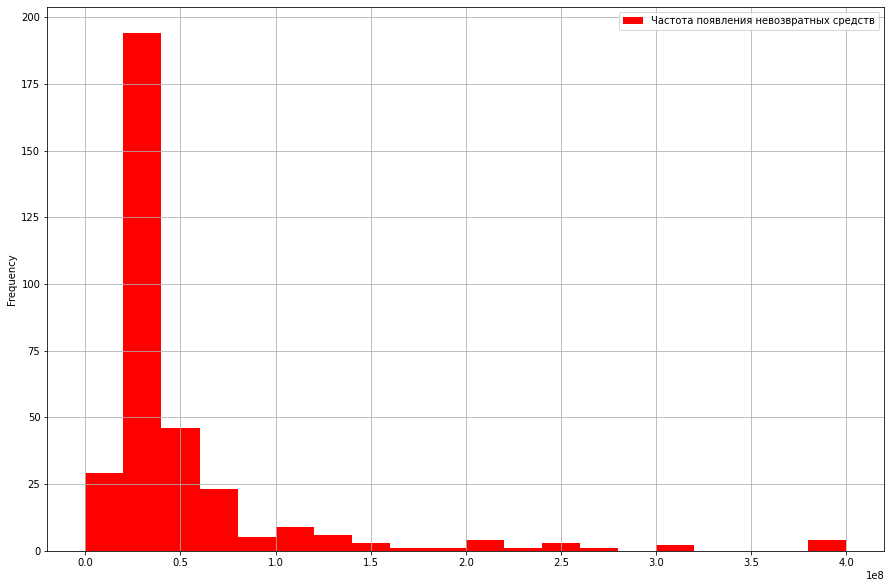

In [76]:
data_full['nonrefundable_support'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'red', \
                        label ='Частота появления невозвратных средств', legend = 'reverse', bins = 20)

In [77]:
data_full['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

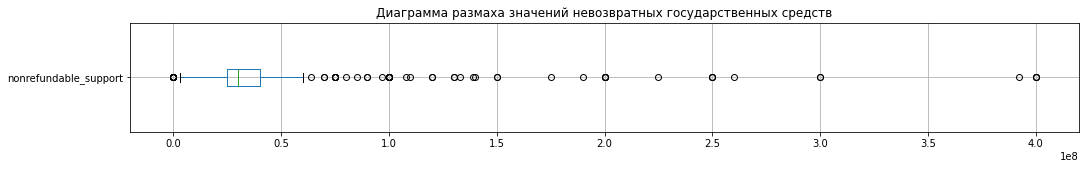

In [78]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_full[['nonrefundable_support']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений невозвратных государственных средств');
# ax.set_xlim(0, 400);

In [79]:
data_full['nonrefundable_support'].isna().mean()*100

95.56386958845538

**Пояснение:**

Был обработан столбец 'nonrefundable_support', содержащий информацию об объёме невозвратных средств государственной поддержки;, а для иллюстрации частоты появления построена гистограмма (на ней столбцами красного цвета разной высоты отображены группы; чем выше столбец, тем чаще его группа встречается в исходных данных). Также была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее и гуще, тем больше там данных, попавших в данную область. 

Так, по графику можно сделать вывод, что объем средств начинается с 0 (нуля), что говорит о том, что значения такого рода присутсвуют, также можно заметить, что столбец, отражающий от 0.3 до 0.4, является наиболее многочисленным. Подтверждение этому нахождение показателей по данным столбца 'nonrefundable_support' - показатель минимума находиться в 0 (нуле), что говорит о том, что некоторым фильмам могли выдаваться государственные средства только на возвратной основе, то есть невозвратные средства, содержащиеся в данном столбце равнялись 0 (нулю). 

Подсчет пропущенных значений, которые не были заменены ни на какие другие значения, говорит о том, что примерно 96% данных отсутсвуют, из чего можно сделать вывод, что "отсутсвие" данных в данном столбце - показатель того, что никакие государственные средства со стороны России не были выделены на создание соответсвующих кинокартин. Однако, в отличии от 'refundable_support', медианное значение не находится в 0 (нуле), что может свидетельствовать о том, что гораздо чаще выдавались средства на невозвратной основе.

Таким образом, для продолжения работы над проектом рекомендуется не заменить пропущенные значения на медианное или другие значения, так как это может привести к искажению результатов.

<AxesSubplot:ylabel='Frequency'>

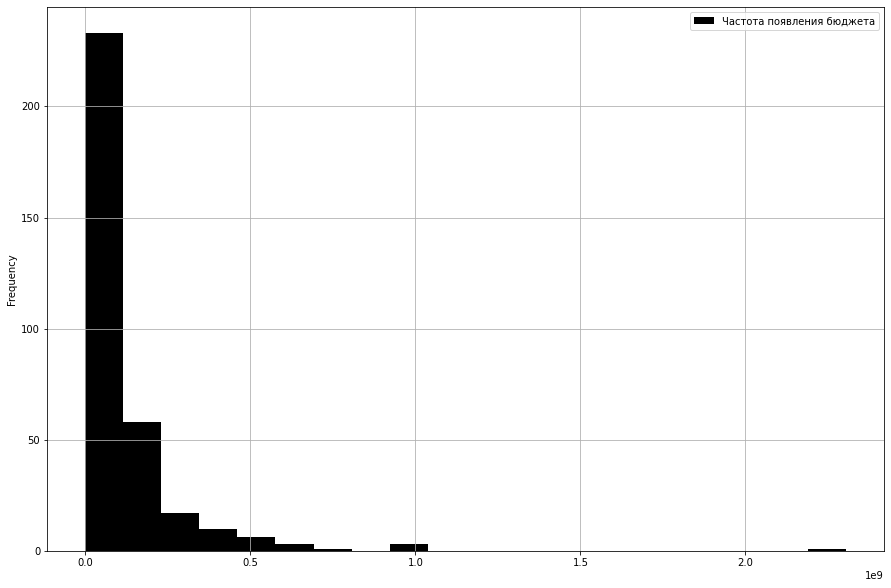

In [80]:
data_full['budget'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'black', \
                        label ='Частота появления бюджета', legend = 'reverse', bins = 20)

In [81]:
data_full['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

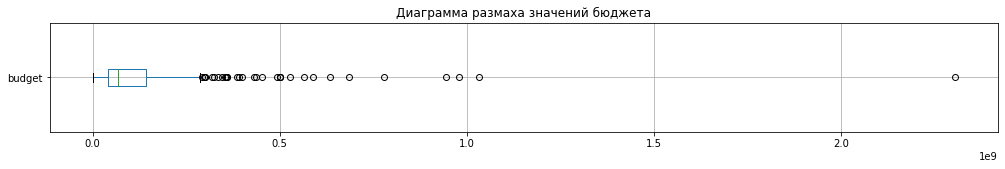

In [82]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_full[['budget']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений бюджета');

In [83]:
data_full['budget'].isna().mean()*100

95.56386958845538

**Пояснение:**

Был обработан столбец 'budget', содержащий информацию об объёме бюджета каждой киноленты;, а для иллюстрации частоты появления построена гистограмма (на ней столбцами черного цвета разной высоты отображены группы; чем выше столбец, тем чаще его группа встречается в исходных данных). Также была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее и гуще, тем больше там данных, попавших в данную область. 

Так, по графику можно сделать вывод, что объем средств начинается с 0 (нуля), что говорит о том, что значения такого рода присутсвуют, также можно заметить, что столбец, отражающий от 0 до 0.1, является наиболее многочисленным. Подтверждение этому нахождение показателей по данным столбца 'budget' - показатель минимума находиться в 0 (нуле), что говорит о том, что таким фильмам могли выдаваться государственные средства со стороны России, но по неизвестной причине бюджет киноленты не указан. Стоит отметить, что согласно инструкциям по полученным изначально данным, если значение в графе 'budget' не отсутсвует, то это показатель того, что Россия выделяла финансирование соответсвующему фильму.

Подсчет пропущенных значений, которые не были заменены ни на какие другие значения, говорит о том, что примерно 96% данных отсутсвуют, из чего можно сделать вывод, что "отсутсвие" данных в данном столбце - показатель того, что никакие государственные средства со стороны России не были выделены на создание соответсвующих кинокартин. 

Таким образом, для продолжения работы над проектом стоит рассмотреть данный столбец повторно на нахождение строк, в которых бюджет равен 0 (нулю) при присутсвующих значениях возвратных и невозвратных средств, и по возможности и целесообразности заменить такие данные на соответствующее значение.

<AxesSubplot:ylabel='Frequency'>

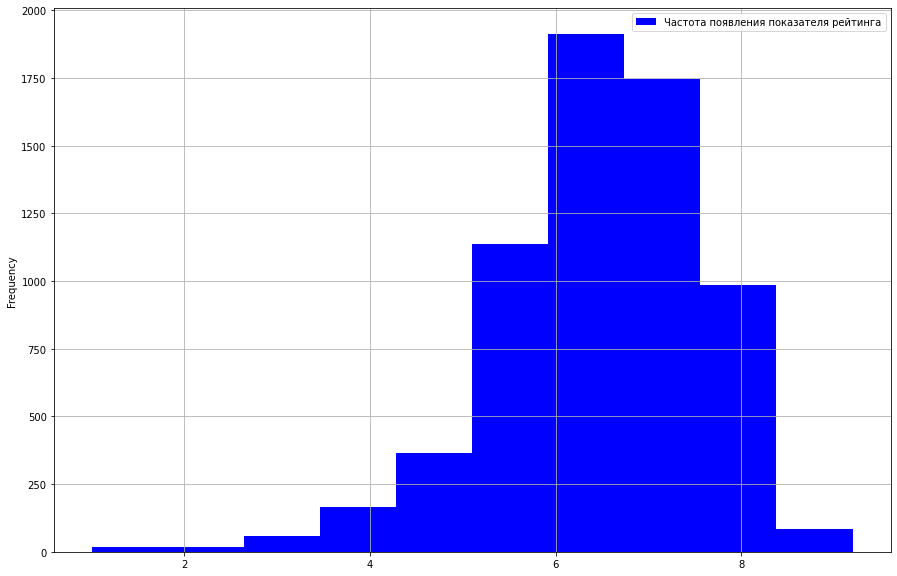

In [84]:
data_full['ratings'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'blue', \
                        label ='Частота появления показателя рейтинга', legend = 'reverse', bins = 10)

<AxesSubplot:ylabel='Frequency'>

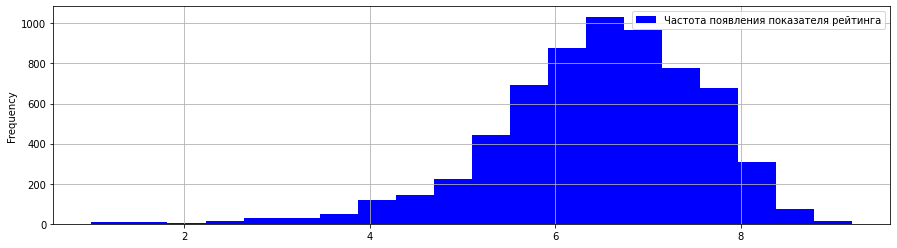

In [85]:
data_full['ratings'].plot(kind = 'hist', figsize = (15, 4), grid = True, color = 'blue', \
                        label ='Частота появления показателя рейтинга', legend = 'reverse', bins = 20)

In [86]:
data_full['ratings'].describe()

count    6489.000000
mean        6.479103
std         1.101690
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

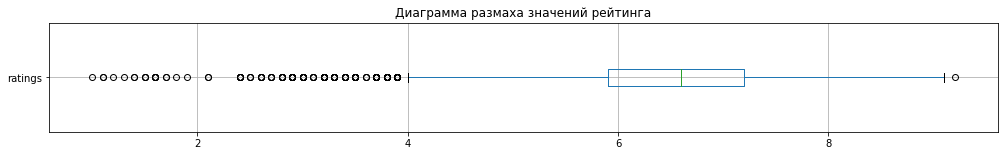

In [87]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_full[['ratings']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений рейтинга');

In [88]:
data_full['ratings'].isna().mean()*100

13.295029396044896

**Пояснение:**

Был обработан столбец 'ratings', содержащий информацию об рейтинге каждой киноленты на КиноПоиске;, а для иллюстрации частоты появления построена гистограмма (на ней столбцами синего цвета разной высоты отображены группы; чем выше столбец, тем чаще его группа встречается в исходных данных). Также была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее и гуще, тем больше там данных, попавших в данную область. 

Так, по графику можно сделать вывод, что рейтинг не начинается с 0 (нуля), что говорит о том, что значения такого рода не присутсвуют, также можно заметить, что столбец от 5.9 до 6.9 является наиболее многочисленным. Подтверждение этому нахождение показателей по данным столбца 'ratings' - показатель минимума находиться в 0 (нуле), а медианное значение в 6.6. 

Подсчет пропущенных значений, которые не были заменены ни на какие другие значения, говорит о том, что примерно 13% данных отсутсвуют, из чего можно сделать вывод о надежности таких данных: пропуски в таких данных могли появится по техническим причинам, которые на данном этапе не известны, а их замена на среднее или медианное значение может оказать отрицательный эффект на конечные результты и выводы.

Таким образом, для возможности продолжить работу над проектом не рекомендуется заменять пропущенные значения, также беря во внимание тот факт, что рейтинг очень сложно предугадать, ведь он не зависит напрямую от бюджета фильма, а скорее от субъективных предпочтений зрителей.

<AxesSubplot:ylabel='Frequency'>

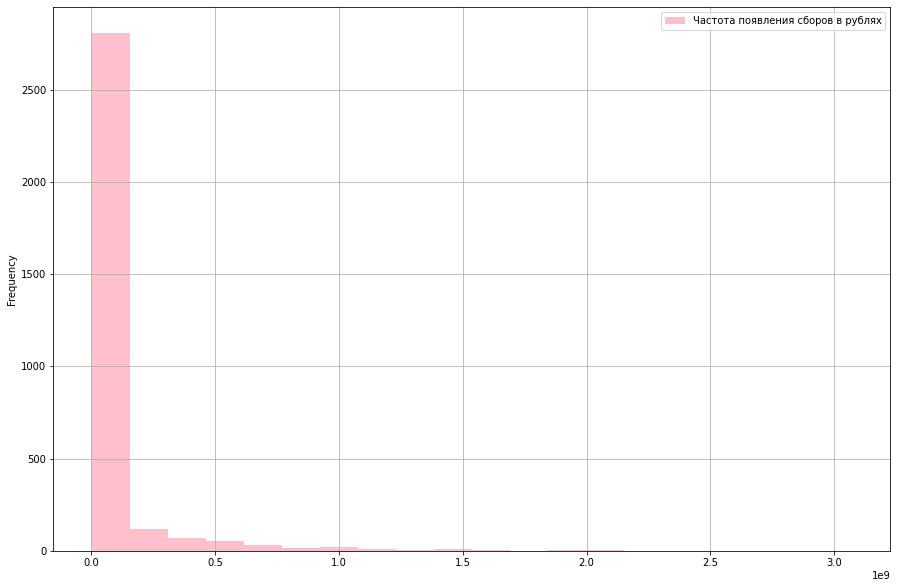

In [89]:
data_full['box_office'].plot(kind = 'hist', figsize = (15, 10), grid = True, color = 'pink', \
                        label ='Частота появления сборов в рублях', legend = 'reverse', bins = 20)

In [90]:
data_full['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

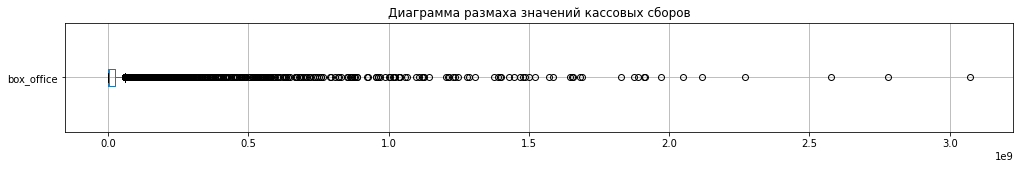

In [91]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_full[['box_office']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений кассовых сборов');

In [92]:
data_full['box_office'].isna().mean()*100

57.80331373597007

In [93]:
data_full [data_full['box_office'] < 1000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Не указано,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,8.1,драма,1165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,Озеро Диких гусей,121036619,2019-12-04,Художественный,"Грин Рэй Филмз, Мементо Филмз",Китай-Франция,Дяо Инань,"Ян Шэнь, Мишель Меркт",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.5,"драма,криминал,фильм-нуар",820589.0
7445,Выпьем за любовь,121036319,2019-12-06,Художественный,"Константин филм, Глобал скрин",Германия,Зёнке Вортманн,"Том Списс, Марк Конрад, Сьюзанн Функе",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,6.5,комедия,836561.0
7456,Шарнохой - жёлтый пёс,111021819,2019-12-12,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,NaN,Не указано,129500.0
7462,Небо измеряется милями,111021919,2019-12-19,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,6.5,"военный,история",367224.0


In [94]:
data_full [(data_full['box_office'] >= 2000000000)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2858,Зверополис,124000316,2016-02-15,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,8.3,"мультфильм,комедия,криминал",2.048126e+09
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,6.6,"фэнтези,боевик,комедия",2.118396e+09
5652,Движение вверх,111011817,2017-12-21,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
6548,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09
6819,Мстители: Финал,121005519,2019-04-29,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,7.6,"фантастика,боевик,драма",2.576614e+09
7455,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09


**Пояснение:**

Был обработан столбец 'box_office', содержащий информацию об объёме кассовых сборов каждой киноленты;, а для иллюстрации частоты появления построена гистограмма (на ней столбцами разовго цвета разной высоты отображены группы; чем выше столбец, тем чаще его группа встречается в исходных данных). Также была рассмотрена диаграмма размаха, на которой длинным черным хвостом изображены выбросы (или аномальные значения), чем хвост чернее и гуще, тем больше там данных, попавших в данную область. 

Так, по графику можно сделать вывод, что объем сборов начинается с 0 (нуля), что говорит о том, что значения такого рода присутсвуют, также можно заметить, что столбец, отражающий от 0 до 0.1, является наиболее многочисленным. Подтверждение этому нахождение показателей по данным столбца 'box_office' - показатель минимума находиться в 0 (нуле). 

Однако, медианное значение не находится в 0 (нуле), что вызвало подозрения касательно нахождения в данном столбце "выбросов". Отсортировава данные столбца, которые меньше 1000000 рублей, можно увидеть, что 1258 фильмов имеют необычно низкие показатели кассовых сборов, которые могли появиться в результате неправильного ввода данных по этапе сбора информации. Также на диаграмме размаха были обнаружены "выбросы" более 2000000000 рублей. Так, выставить ограничения для столбца от 1000000 до 1500000000, с целью привести данные к более надежным показателям без аномалий, не является возможным, так как в данных присутсвует большое кол-во пропущенных значений, чье удаление после ограничений может привести к искажению данных.

Подсчет пропущенных значений, которые не были заменены ни на какие другие значения, говорит о том, что примерно 58% данных отсутсвуют, из чего можно сделать вывод о том, что такие "пропуски" не ошибки, а заведомо не указанные значения.

Таким образом, для возможности продолжить работу над проектом рекомендуется проводить анализ с имеющимися данными, так как кассовые сборы так же сложно предугадать и усреднить, как и рейтинг кинофильмов.

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** 

В данной части были изучены перечисленные ниже числовые параметры и построены отдельные диаграммы для каждого из них для большей наглядности данных: 
* объём возвратных средств государственной поддержки;
* объём невозвратных средств государственной поддержки;
* общий бюджет фильма;
* рейтинг фильма на КиноПоиске;
* сборы в рублях.
    
Так, было выявлено, что в столбцах 'refundable_support', 'nonrefundable_support' и 'budget' большая часть данных - это пропущенные значения, так 96% всех данных в каждом столбце - это отсутсвующие значения. Ссылаясь на изначальную информацию и проведя анализ, можно сделать вывод, что "отсутсвие" данных в одном из столбцов или в обоих 'refundable_support' и 'nonrefundable_support' - показатель того, что возвратные и/или невозвратные государственные средства со стороны России не были выделены на создание соответсвующих кинокартин. Напротив, если в данных стоит 0 (ноль) - это показатель того, что только один из видов государственных средств не был выделен (в соответствии нахождению 0 (нуля)). Также при нахождении 0 (нуля) в столбце 'budget' говорит о том, что таким фильмам могли выдаваться государственные средства со стороны России, но по неизвестной причине бюджет киноленты не указан. Стоит отметить, что согласно инструкциям 
по полученным изначально данным, если значение в графе 'budget' не отсутсвует, то это показатель того, что Россия выделяла финансирование соответсвующему фильму. 

Таким образом, для продолжения работы над проектом стоит рассмотреть столбец 'budget' повторно на нахождение строк, в которых бюджет 
равен 0 (нулю) при присутсвующих значениях возвратных и невозвратных средств, и по возможности и целесообразности заменить такие данные на соответствующее значение.
    
Были также рассмотрены показатели по столбцам 'ratings' и 'box_office', где также были обнаружены пропущенные значения, но уже в гораздо меньшем количестве (13% и 58% соотвтсвенно). Замена данных показателей на медианное или среднее значение ставится под вопрос: данные по рейтингу и сборам слишком зависят от факторов, не представленных в датасете, многие из которых касаются клиентов. Так, для более точного результата рекомендуется не менять данные в столбцах на какие-либо значения.

***Обработка пропущенных значений в столбцах 'refundable_support', 'nonrefundable_support' и 'budget'***

Text(0.5, 1.0, 'Зависимость между возвратными и невозвратными гос. средствами и бюджетом')

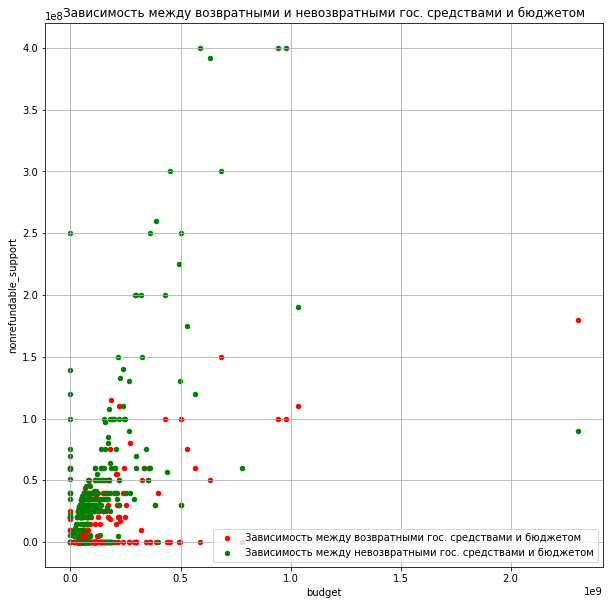

In [95]:
ax = data_full.plot (kind = 'scatter', y = 'refundable_support', x = 'budget', grid = True, \
                     color = 'red', label ='Зависимость между возвратными гос. средствами и бюджетом', figsize = (10,10))

data_full.plot (kind = 'scatter', y = 'nonrefundable_support', x = 'budget', grid = True, \
                     color = 'green', label ='Зависимость между невозвратными гос. средствами и бюджетом', ax = ax)
plt.title('Зависимость между возвратными и невозвратными гос. средствами и бюджетом')

In [96]:
rnb = data_full[['refundable_support', 'nonrefundable_support', 'budget']]
rnb.corr()

,refundable_support,nonrefundable_support,budget
refundable_support,1.000000,0.359622,0.641224
nonrefundable_support,0.359622,1.000000,0.594169
budget,0.641224,0.594169,1.000000


In [97]:
state_support = ((data_full ['refundable_support'] + data_full ['nonrefundable_support'])/ \
data_full ['budget']).median()
state_support

0.6140376284219444

In [98]:
data_full [(data_full ['production_country'].str.contains('Россия')) & (data_full ['budget'] == 0)]\
[['refundable_support', 'nonrefundable_support', 'budget']]

,refundable_support,nonrefundable_support,budget
2052,0.0,23000000.0,0.0
2057,0.0,75000000.0,0.0
2471,10000000.0,70000000.0,0.0
2531,20000000.0,0.0,0.0
2614,60000000.0,100000000.0,0.0
2683,0.0,59000000.0,0.0
2787,0.0,35000000.0,0.0
2873,0.0,6000000.0,0.0
3046,19000000.0,51000000.0,0.0
3564,0.0,250000000.0,0.0


In [99]:
data_full.loc [(data_full ['production_country'].str.contains('Россия')) & (data_full ['budget'] == 0), 'budget'] = \
(data_full.loc [(data_full ['production_country'].str.contains('Россия')) & (data_full ['budget'] == 0), \
           'refundable_support'] + data_full.loc [(data_full ['production_country'].str.contains('Россия')) & \
                                              (data_full ['budget'] == 0), 'nonrefundable_support'])/state_support

In [100]:
data_full [(data_full ['production_country'].str.contains('Россия')) & (data_full ['budget'] > 0)]\
[['refundable_support', 'nonrefundable_support', 'budget']]

,refundable_support,nonrefundable_support,budget
1281,0.0,26500000.0,79411900.0
1448,0.0,26000000.0,37142857.0
1498,0.0,107847945.0,176023490.0
1524,0.0,28000000.0,40574140.0
1792,0.0,25000000.0,40015122.0
...,...,...,...
7463,100000000.0,400000000.0,980000000.0
7465,100000000.0,0.0,190000000.0
7473,100000000.0,400000000.0,944000000.0
7475,0.0,30000000.0,46154000.0


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
    
***Вывод:*** 

В данной части были изучены данные: 
* объём возвратных средств государственной поддержки;
* объём невозвратных средств государственной поддержки;
* общий бюджет фильма;
    
Так, для наглядности зависимости данных между собой была постороена диаграмма рессеяния, а также расчитаны коэффициенты корреляции Пирсона, которые математически демонстрируют положительную умеренную зависимость показателей (т.е. при. росто одного, другой тоже будет увеличиваться).
    
Далее на основе имеющихся данных, была расчитана часть, которую занимает сумма объём возвратных и невозвратных средств государственной поддержки от всего бюджета фильма по каждой отдельной стороке, затем, для более надежных результатов было найдено медианное значение такой части, которое равно 61%. 
    
Была просмотрена инфорация по фильмам, снятым частично или полностью в России, и в бюджете у которых значился 0 (ноль), несмотря на то, что были указаны выделенные объемы государственных средств. Для каждого из получившихся 17 фильмов, были найдены предположительные объемы бюджета, основываясь на сумме соответсвующих возвратных и невозвратных гос. средств и ее медианной части от всего бюджета фильма.
    
Таким образом, для дальнейшей работы были получены 332 строки (информаций по фильмам), на основе которых будет проходить анализ основной задачи проекта.

#### Шаг 2.6. Добавьте новые столбцы





In [101]:
data_full ['show_start_year'] = data_full ['show_start_date'].dt.year

In [102]:
data_full ['genres'] = data_full['genres'].str.split(pat = ',')

In [103]:
data_full ['main_genre'] = data_full['genres'].str.get(0)

In [104]:
data_full ['director'] = data_full['director'].str.split(pat = ',')

In [105]:
data_full ['main_director'] = data_full['director'].str.get(0)

In [106]:
data_full ['state_support_part'] = (data_full ['refundable_support'] + data_full ['nonrefundable_support'])*100/ \
data_full ['budget'] 

In [107]:
data_full

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,state_support_part
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,[Кевин Костнер],"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,7.2,"[боевик, драма, мелодрама]",NaN,2015,боевик,Кевин Костнер,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,[Е.Матвеев],Не указано,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Не указано,6.6,"[драма, военный]",NaN,2016,драма,Е.Матвеев,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,[Тимур Бекмамбетов],"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"[фантастика, боевик, триллер]",NaN,2016,фантастика,Тимур Бекмамбетов,NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,[Тимур Бекмамбетов],"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"[фантастика, боевик, триллер]",NaN,2016,фантастика,Тимур Бекмамбетов,NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,[Тимур Бекмамбетов],"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Не указано,6.8,"[фантастика, боевик, триллер]",NaN,2015,фантастика,Тимур Бекмамбетов,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,[Фил Грабски],Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Не указано,NaN,[Не указано],NaN,2019,Не указано,Фил Грабски,NaN
7481,Звериная ярость,121037819,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,[Ник Пауэлл],"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Не указано,5.4,"[боевик, триллер]",NaN,2019,боевик,Ник Пауэлл,NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США-Канада,[Чарльз Е.Бастьен],Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,[Не указано],NaN,2019,Не указано,Чарльз Е.Бастьен,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""",Кипр-Россия,[А.Беляев],Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Не указано,NaN,[Не указано],NaN,2019,Не указано,А.Беляев,NaN


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе в таблицу были добавлены новые столбцы для того, чтобы более цело категаризовать данные, а также нагляднее и лаконичнее продемонстрировать их, в последующем для получения более полных результатов на дальнейших этапах анализа.

Так, были сформированы следующие дополнительные столбцы:
1) 'show_start_year' - с информацией о годе проката каждого фильма;\
2) 'main_director' - с именем и фамилией главного режиссёра каждого фильма;\
3) 'main_genre' - с основным жанром каждого фильма.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [108]:
data_full.pivot_table (index = 'show_start_year', values = 'puNumber', aggfunc = 'count', margins = True) 

,puNumber
show_start_year,
2010,985
2011,622
2012,593
2013,630
2014,806
2015,705
2016,818
2017,505
2018,891


Text(0.5, 1.0, 'Кол-во вышедших фильмов по годам')

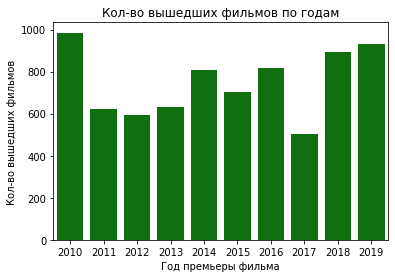

In [109]:
sns.barplot(x = 'show_start_year', y = 'puNumber', data = data_full, estimator = len, color = 'green')
plt.xlabel('Год премьеры фильма')
plt.ylabel('Кол-во вышедших фильмов')
plt.title('Кол-во вышедших фильмов по годам')

In [110]:
datadata = data_full.pivot_table (index = 'show_start_year', values = ['puNumber', 'box_office'], aggfunc = 'count')
datadata['part'] = datadata['box_office']/datadata['puNumber']
datadata = datadata.reset_index()
datadata

,show_start_year,box_office,puNumber,part
0,2010,105,985,0.106599
1,2011,109,622,0.175241
2,2012,128,593,0.215852
3,2013,184,630,0.292063
4,2014,279,806,0.346154
5,2015,465,705,0.659574
6,2016,526,818,0.643032
7,2017,357,505,0.706931
8,2018,475,891,0.533109
9,2019,530,929,0.570506


Text(0.5, 1.0, 'Доля фильмов с известной информацией о прокате в кинотеатрах по годам')

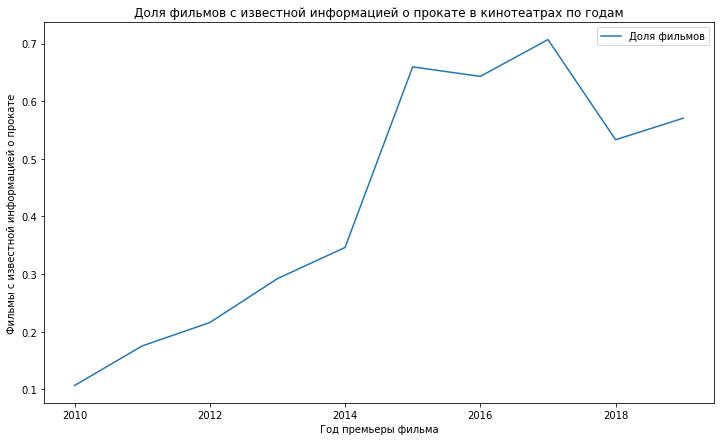

In [111]:
datadata.plot(x = 'show_start_year', y = 'part', figsize=(12,7))
plt.legend(['Доля фильмов'])
plt.xlabel('Год премьеры фильма')
plt.ylabel('Фильмы с известной информацией о прокате')
plt.title('Доля фильмов с известной информацией о прокате в кинотеатрах по годам')

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе было проанализировано количество фильмов, выходивших в прокат, по каждому году. Для нагядности были созданы сводная таблица, столбцатая диаграмма и линейная диаграмма. Так, можно увидеть, что наибольшее число кинолент вышло в прокат в 2010 году, а наименьшее - в 2017 году. Пропущенных значений в данных для анализа не найдено, что говорит о полноте возможных выводов.
    
При анализе доли фильмов, у которых известна информация о прокате в кинотеатрах (указан кассовый сбор), наиболее полным по данным является 2017 год, так у него доля кассовых сборов по отношению к полученным прокатным удостоверениям равна 0.7, что является наивысшим показателем.
    
Сделать однозначный вывод, что именно год влияет на число выходов фильмов нельзя, так как последнее зависит во многом от числа картин снятых в каждом коду по миру. Более того, в данном датасете содержится лишь информация касательно Российского рынка кинопроката, когда как он ограничивается многими факторам, в том числе цензурой.
    
Таким образом, по годам можно лишь отследить количество фильмов постфактум, когда как выводы о причинах конкретных чисел стоит искать в ограничениях по закупкам лицензий на киноленты, при этом учитывая различные политические и экономические факторы, как например санкции.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [112]:
box_office_year = data_full.pivot_table (index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
box_office_year = box_office_year.reset_index()
box_office_year

,show_start_year,box_office
0,2010,2.428654e+06
1,2011,1.410276e+07
2,2012,6.955423e+06
3,2013,2.979971e+07
4,2014,7.444952e+09
5,2015,3.949737e+10
6,2016,4.786630e+10
7,2017,4.856371e+10
8,2018,4.966840e+10
9,2019,4.842571e+10


Text(0.5, 1.0, 'Объем кассовых сборов по годам')

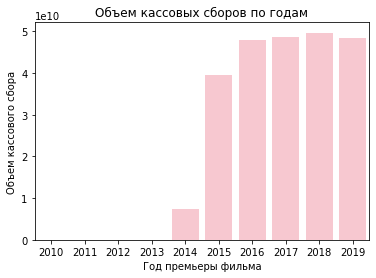

In [113]:
sns.barplot(x = 'show_start_year', y = 'box_office', data = box_office_year, color = 'pink', estimator = sum)
plt.xlabel('Год премьеры фильма')
plt.ylabel('Объем кассового сбора')  
plt.title('Объем кассовых сборов по годам')

Text(0.5, 1.0, 'Объем кассовых сборов по годам')

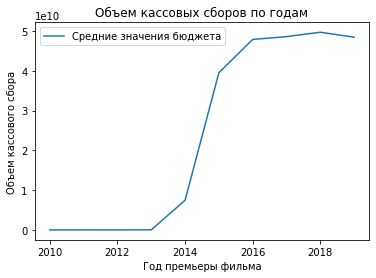

In [114]:
box_office_year.plot(x = 'show_start_year', y = 'box_office')
plt.legend(['Средние значения бюджета'])
plt.xlabel('Год премьеры фильма')
plt.ylabel('Объем кассового сбора')
plt.title('Объем кассовых сборов по годам')

In [115]:
print(box_office_year[box_office_year['box_office'] == min(box_office_year['box_office'])])

print(box_office_year[box_office_year['box_office'] == max(box_office_year['box_office'])])

   show_start_year  box_office
0             2010   2428654.0
   show_start_year    box_office
8             2018  4.966840e+10


<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе было проанализировано как менялась динамика кассовых сборов проката по годам. Для нагядности были созданы сводная таблица, линейный график и столбцатая диаграмма.
    
Так на графиках хорошо виден рост в кассовых сборах, который начался резким скачком в 2014 году и продолжался до 2019 года, характеризуясь значительной однородностью, то есть рост или спад были незначительными. Данные за 2010 - 2013 года характеризуются малым уровнем кассовых сборов относительно описанного ранее периода. 
    
Таким образом, для большей иллюстрации разрыва между показателями, были расчитаны минимальное и максимальное значения. Минимальный сбор зафиксирован в 2010 году - 2428654.0, а максимальный в 2018 - 4.966840e+10. Такой резкий разрыв в показателях объясняется введением 1 июля 2014 года в России обязательства на получение прокатного, таким образом, после того момента статистика пополнилась данными, которые ранее оставались бы неучетнными из-за отсутсвия получения гос. разрешения на показ фильмов.
    
Однако, стоит еще раз отметить, что показатель года - это скорее название группы для различных факторов, влиящих на кассовые сборы. Так, резкий скачек в кассовых сборах может являться знаком успешных рекламных компаний многих кинолент.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [116]:
box_office_median_mean = (
    data_full.pivot_table (index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
    .reset_index()
)
box_office_median_mean.columns = ['show_start_year', 'box_office_mean', 'box_office_median']
box_office_median_mean

,show_start_year,box_office_mean,box_office_median
0,2010,2.313004e+04,1700.000
1,2011,1.293832e+05,3000.000
2,2012,5.433924e+04,5660.000
3,2013,1.619549e+05,3522.500
4,2014,2.668442e+07,18160.000
5,2015,8.494057e+07,4920933.000
6,2016,9.100057e+07,3846679.410
7,2017,1.360328e+08,9968340.000
8,2018,1.045651e+08,8891102.210
9,2019,9.136926e+07,4627798.345


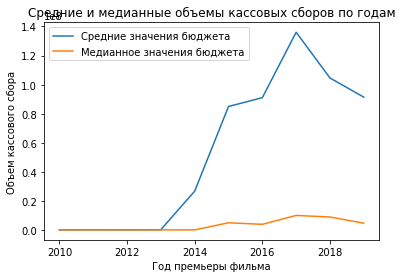

In [117]:
ax = box_office_median_mean.plot(x = 'show_start_year', y = 'box_office_mean', xlabel = 'year', ylabel = 'box_office')
box_office_median_mean.plot(x = 'show_start_year', y = 'box_office_median', xlabel = 'year', ylabel = 'box_office',\
                            ax=ax)
plt.xlabel('Год премьеры фильма')
plt.ylabel('Объем кассового сбора')  
plt.title('Средние и медианные объемы кассовых сборов по годам')
plt.legend(['Средние значения бюджета', 'Медианное значения бюджета'])

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе были расчитаны проанализированы средняя и медианная сумму сборов для каждого года. Для нагядности были созданы сводная таблица и линейный график.
    
Так на графиках хорошо видна динамика роста кассовых сборах как по медианному, так и по среднему значению, которая к 2019 году характеризуется спадом обоих показателей. Стоит также отметить, что кривая среднего (синяя) находится намного выше и имеет более "гористый" вид с более явными спадами и высотами, чем кривая медианного (оранжевая), это обосновывается тем фактом, что на последнюю меньше оказывают влияния какие-либо минимально высокие или низкие показатели, из-за чего стоит в большей мере ориентироваться на нее.
    
Таким образом, график иллюстрирует выводы, сделанные в предыдущем пункте, лишь усредняя показатели.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [118]:
box_office_restriction1 = data_full.query ('show_start_year > 2014')
box_office_restriction1['age_restriction'] = box_office_restriction1['age_restriction'].str.split(pat = '-')
box_office_restriction1['age_restrictions'] = box_office_restriction1['age_restriction'].str.get(0)
box_office_restriction2 = box_office_restriction1.pivot_table (index = 'show_start_year', columns = 'age_restrictions', \
                                         values = 'box_office', aggfunc = 'sum')
box_office_restriction2

/tmp/ipykernel_159/4004337557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_office_restriction1['age_restriction'] = box_office_restriction1['age_restriction'].str.split(pat = '-')
/tmp/ipykernel_159/4004337557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_office_restriction1['age_restrictions'] = box_office_restriction1['age_restriction'].str.get(0)


age_restrictions,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


Text(0.5, 1.0, 'Суммы значений кассовых сборов по возрастным категориям за 2015-2019 года')

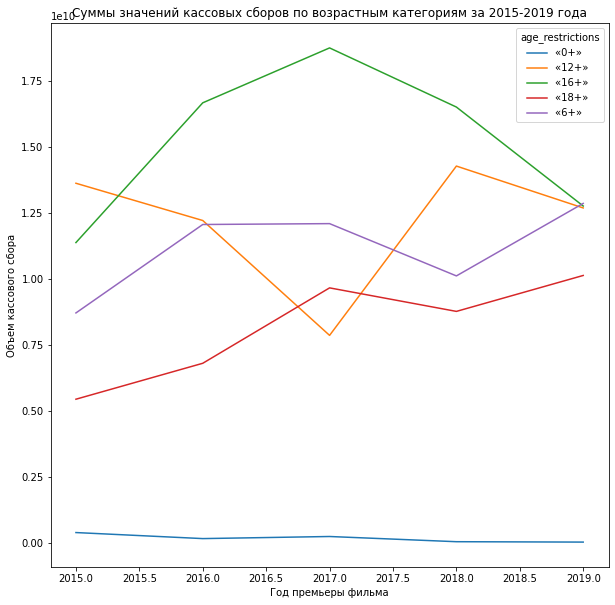

In [119]:
box_office_restriction2.plot(figsize = (10,10))
plt.xlabel('Год премьеры фильма')
plt.ylabel('Объем кассового сбора')  
plt.title('Суммы значений кассовых сборов по возрастным категориям за 2015-2019 года')

[Text(0.5, 0, 'Сумма кассовых сборов'), Text(0, 0.5, 'Возрастная категория')]

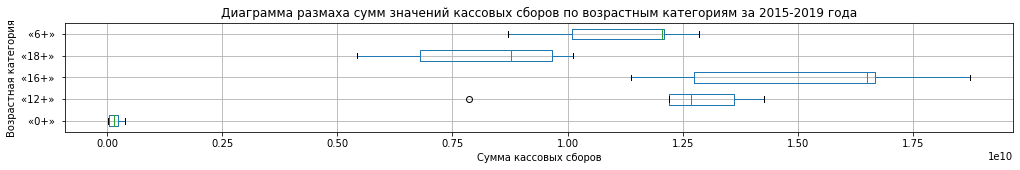

In [120]:
fig, ax = plt.subplots(figsize = (17,2))
ax = box_office_restriction2.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха сумм значений кассовых сборов по возрастным категориям за 2015-2019 года')
ax.set (xlabel = 'Сумма кассовых сборов', ylabel = 'Возрастная категория')

In [121]:
box_office_restriction3 = box_office_restriction1.pivot_table (index = 'show_start_year', columns = 'age_restrictions', \
                                         values = 'box_office', aggfunc = 'mean')
box_office_restriction3

age_restrictions,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2015,9.719348e+06,1.865217e+08,6.766739e+07,4.115385e+07,1.641849e+08
2016,3.664118e+06,1.488347e+08,9.156345e+07,4.499291e+07,1.721878e+08
2017,7.653298e+07,1.914982e+08,1.549177e+08,6.565643e+07,2.685809e+08
2018,6.489800e+06,2.129447e+08,1.057923e+08,4.893903e+07,1.486026e+08
2019,5.915356e+06,1.491788e+08,7.164842e+07,5.531036e+07,1.586734e+08


Text(0.5, 1.0, 'Средние значения кассовых сборов по возрастным категориям за 2015-2019 года')

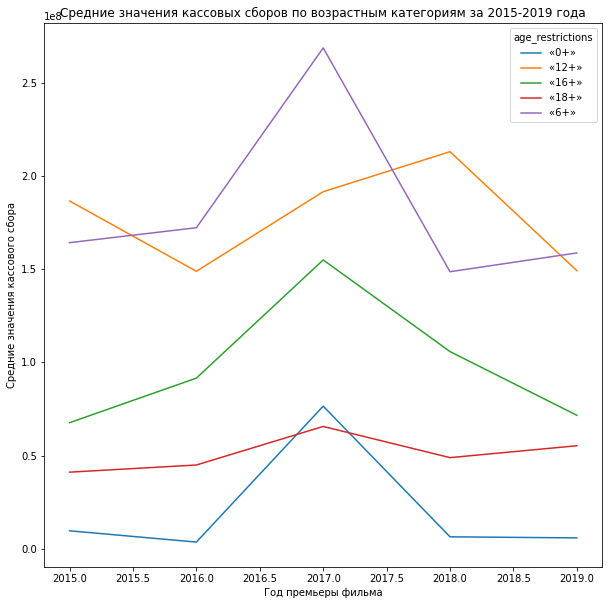

In [122]:
box_office_restriction3.plot(figsize = (10,10))
plt.xlabel('Год премьеры фильма')
plt.ylabel('Средние значения кассового сбора')  
plt.title('Средние значения кассовых сборов по возрастным категориям за 2015-2019 года')

[Text(0.5, 0, 'Среднее кассовых сборов'), Text(0, 0.5, 'Возрастная категория')]

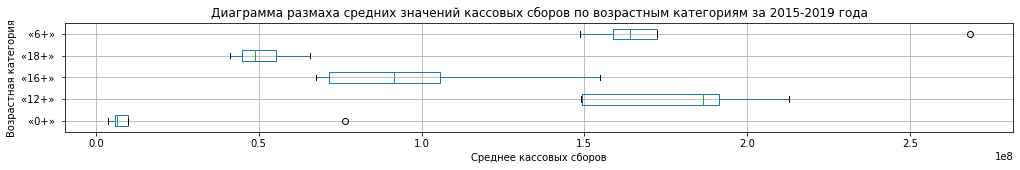

In [123]:
fig, ax = plt.subplots(figsize = (17,2))
ax = box_office_restriction3.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха средних значений кассовых сборов по возрастным категориям за 2015-2019 года')
ax.set (xlabel = 'Среднее кассовых сборов', ylabel = 'Возрастная категория')

In [124]:
box_office_restriction4 = box_office_restriction1.pivot_table (index = 'show_start_year', columns = 'age_restrictions', \
                                         values = 'box_office', aggfunc = 'median')
box_office_restriction4

age_restrictions,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2015,2943318.70,15351562.50,4676819.400,4616614.70,2.038098e+07
2016,2571294.10,4690635.25,5133021.740,6107001.74,3.026256e+06
2017,22178956.00,9010548.00,9702077.000,8212677.00,5.199210e+07
2018,3616937.28,8931965.66,9010638.625,7179466.00,1.468885e+07
2019,3885434.50,3405545.76,3210717.810,5603216.55,1.287535e+07


Text(0.5, 1.0, 'Медиана значений кассовых сборов по возрастным категориям за 2015-2019 года')

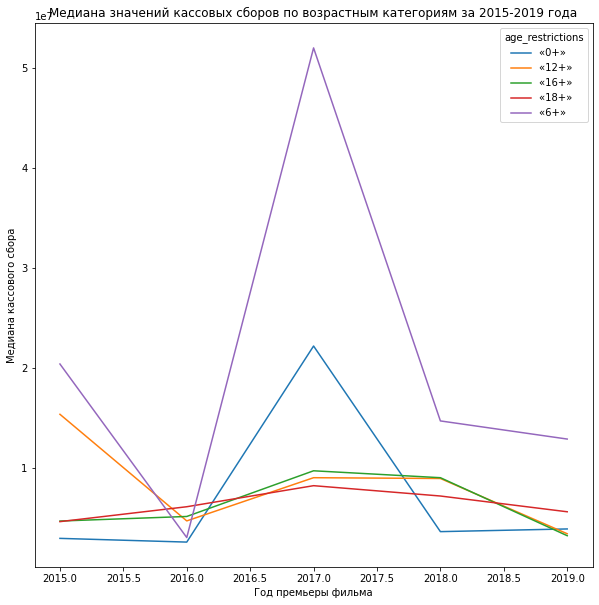

In [125]:
box_office_restriction4.plot(figsize = (10,10))
plt.xlabel('Год премьеры фильма')
plt.ylabel('Медиана кассового сбора')  
plt.title('Медиана значений кассовых сборов по возрастным категориям за 2015-2019 года')

[Text(0.5, 0, 'Медиана кассовых сборов'), Text(0, 0.5, 'Возрастная категория')]

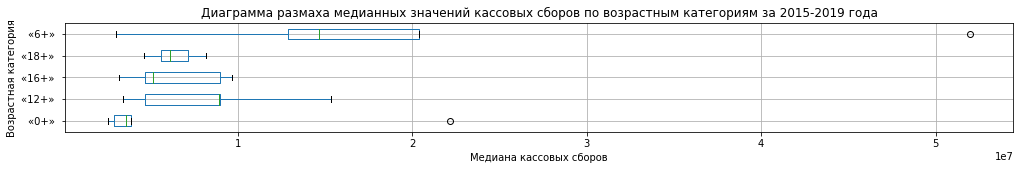

In [126]:
fig, ax = plt.subplots(figsize = (17,2))
ax = box_office_restriction4.boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха медианных значений кассовых сборов по возрастным категориям за 2015-2019 года')
ax.set (xlabel = 'Медиана кассовых сборов', ylabel = 'Возрастная категория')

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:** \
\
На данном этапе было проанализировано влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Для нагядности были созданы сводная таблица, линейный график и диаграммы размаха. Были проанализированы показатели сумм кассовых сборов по каждому году и возрастной категории, а также их средние и медианные значения для большей полноты анализа.
    
Так, проанализировав суммы кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам является группа "«0+» - для любой зрительской аудитории", так сумма сборов имеет направление на спад к 2019 году. Самой кассовой можно считать группу "«16+» - для детей старше 16 лет", однако она имеет тенденцию к спаду к 2019 году. Стоит отметить, что в 2019 году группы "«6+» - для детей старше 6 лет", "«12+» - для детей старше 12 лет" и "«16+» - для детей старше 16 лет" находятся на одной отметки (или на очень схожей) по кассовым сборам. Группа "«18+» - запрещено для детей" к 2019 году начала набирать обороты. 

Проанализировав средние значения кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам также является группа "«0+» - для любой зрительской аудитории", так средние значения сборов имеет близкие к нулю показатели относительно других категорий, однако, 2017 год для данной категории характеризуется резким ростом средних сборов, после чего характеризуется резким спадом вплоть до 2019 года. Самой кассовой по среднему значений сборов за весь период можно считать группу "«12+» - для детей старше 12 лет": она не обладает самыми высокими показателями, однако на протяжении 5 лет сохраняла умеренные колебания уровня средних сборов без резких скачков. Стоит отметить, что в 2017 году группы "«0+» - для любой зрительской аудитории", "«6+» - для детей старше 6 лет" и "«16+» - для детей старше 16 лет" имеет пик в показателях среднего по сборам. Так, группа "«6+» - для детей старше 6 лет" хоть и обладает в 2017 году наиболее высоким средним значением по сборам, однако, в последущие года характеризуется спадом.
    
Проанализировав медианные значения кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам также является все та же группа "«0+» - для любой зрительской аудитории". Напротив, самой кассовой по медианному значению сборов за весь период можно считать группу "«6+» - для детей старше 6 лет": она характеризуется самыми большими колебаниями, в том чсиле и ростом, по сравнению с остальными группами. Стоит отметить, что в 2017 году группы все гурппы имеют пик в показателях медианного значения по сборам.
    
Таким образом, итогами анализа данных по кассовым сборам возрастных категорий фильмов в России за период 2015-2019 года можно считать следующее:
    
1) самой низкой по показателям за весь период является группа "«0+» - для любой зрительской аудитории";

2) самой кассовой по показателям за весь период является группа - "«6+» - для детей старше 6 лет";
    
3) самым кассовым является 2017 год (согласно показателям суммы сборов), в котором самая кассовая категория -   "«16+» - для детей старше 16 лет".
    
Стоит также отметить, что окончательные выводы по пунктам №1 и №2 принимались на основе медианного значения, так как оно более правдаподобно отражает ситуацию, не подвергаясь влиянию аномальных значений.
    
    
Подтверждение в интернет-источниках касательно 2017 года:
   
    
    "...2017-й стал лучшим за все время современного отечественного кинопроката. По данным «Бюллетеня кинопрокатчика», в кинотеатры было выпущено 505 картин, и их общие сборы в России (без учета стран СНГ) за год составили 53,8 млрд рублей (или $921 млн). В рублевом эквиваленте это на 9,7% больше, чем было годом ранее, а в долларовом – больше сразу на 26,5%. За год в кинотеатрах было продано 214,7 млн кинобилетов, что также превышает показатели прошлого года на 10,3%.... 
 
    "...Примечательно, что рост кассы по иностранным картинам оказался незначительным – всего +1,2% по кассе и +0,7% по посещаемости. В то же время российское кино выросло сразу на 49,1% и 53,0% соответственно...." 
[Источник](https://www.kinometro.ru/news/show/name/kinoprokat_2017_summary_6879)
 
 
     "...В Фонде полагают, что столь серьезную кассу российскому кино сделали "Викинг", "Притяжение", "Время первых", "Салют-7", "Большой", "Гоголь. Начало", "Аритмия" - от космических саг и исторического эпоса до психологической драмы...."
[Источник](https://rg.ru/2017/10/23/2017-god-stal-rekordnym-dlia-rossijskogo-kino-po-sboram-i-poseshchaemosti.html)

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [127]:
state_support_russia = data_full [(data_full ['production_country'].str.contains('Россия')) & \
                                  (data_full ['budget'] > 0)]

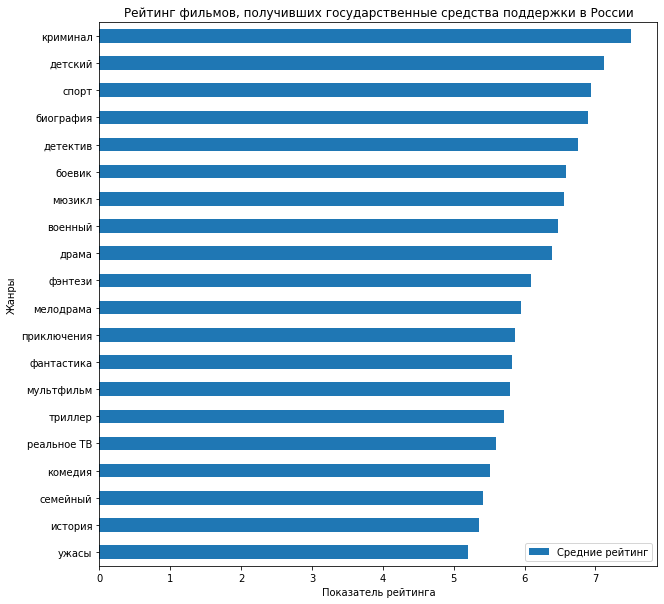

In [128]:
rating_state_support = state_support_russia.pivot_table (index = 'main_genre', values = 'ratings', aggfunc = 'mean')\
.sort_values(by = 'ratings')
rating_state_support.plot(kind = 'barh', figsize = (10,10))
plt.xlabel('Показатель рейтинга')
plt.ylabel('Жанры')  
plt.title('Рейтинг фильмов, получивших государственные средства поддержки в России')
plt.legend(['Средние рейтинг'])

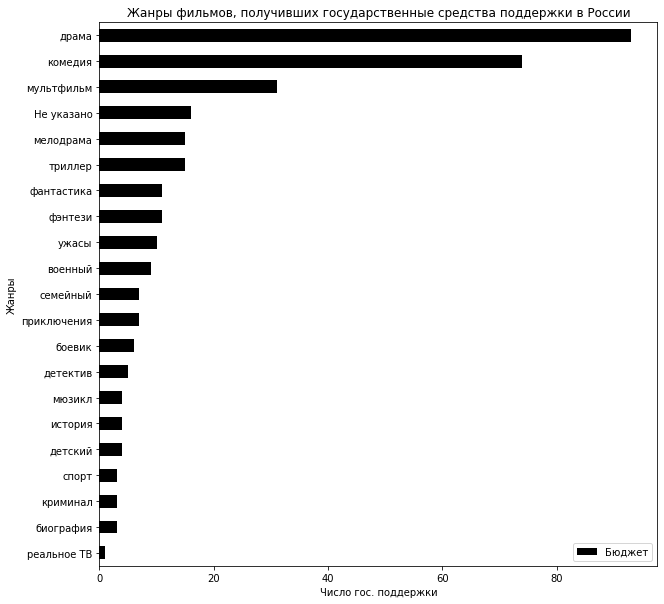

In [129]:
genre_state_support = state_support_russia.pivot_table (index = 'main_genre', values = 'budget', aggfunc = 'count')\
.sort_values(by = 'budget')
genre_state_support.plot(kind = 'barh', figsize = (10,10), color = 'black')
plt.xlabel('Число гос. поддержки')
plt.ylabel('Жанры')  
plt.title('Жанры фильмов, получивших государственные средства поддержки в России')
plt.legend(['Бюджет'])

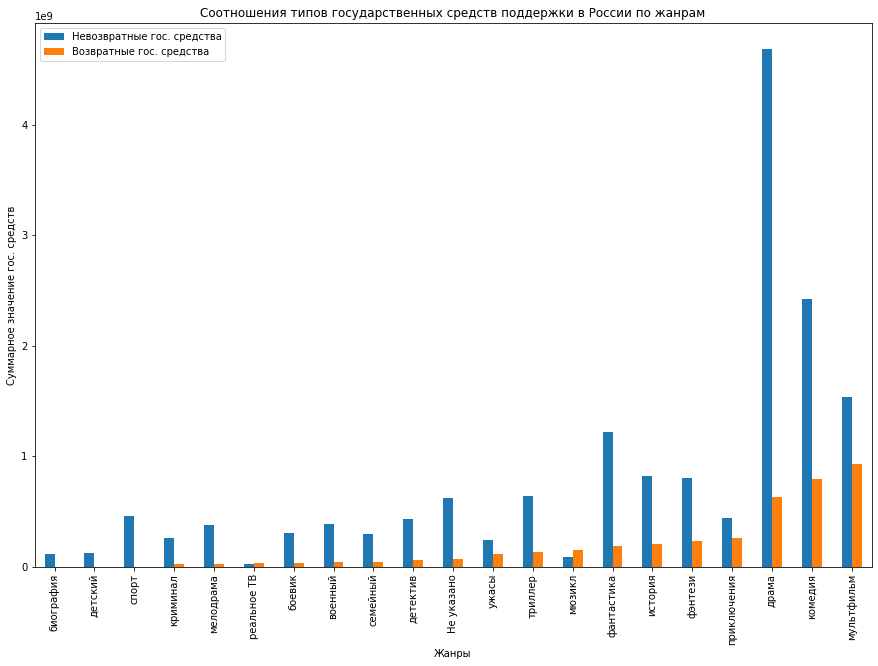

In [130]:
genre_state_support_type = state_support_russia.pivot_table (index = 'main_genre', values = ['refundable_support', \
                                                    'nonrefundable_support'],aggfunc = 'sum')\
.sort_values(by = ['refundable_support', 'nonrefundable_support'])
genre_state_support_type.plot(kind = 'bar', figsize = (15,10))
plt.xlabel('Жанры')
plt.ylabel('Суммарное значение гос. средств')  
plt.title('Соотношения типов государственных средств поддержки в России по жанрам')
plt.legend(['Невозвратные гос. средства', 'Возвратные гос. средства'])

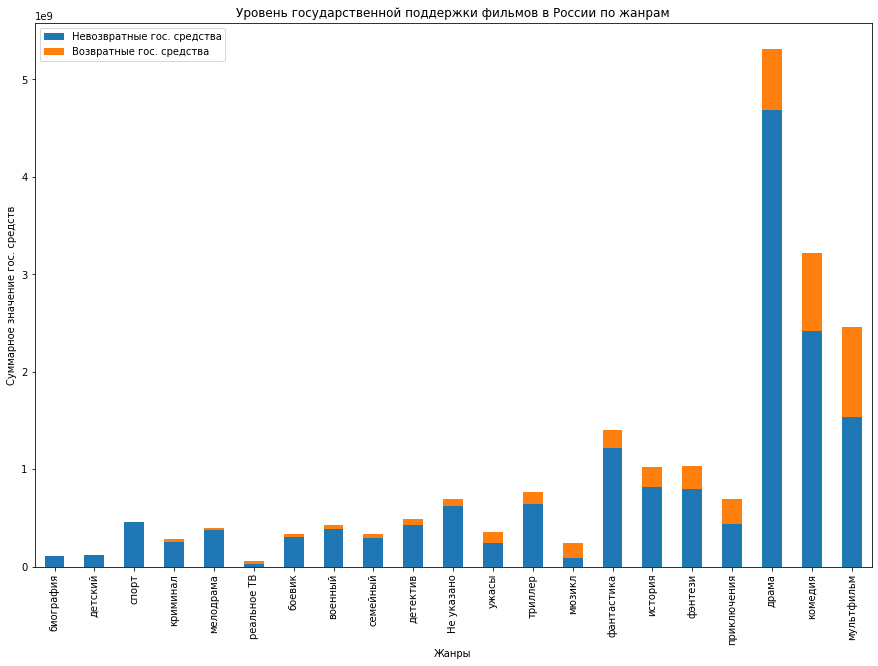

In [131]:
genre_state_support_all = state_support_russia.pivot_table (index = 'main_genre', values = ['refundable_support', \
                                                    'nonrefundable_support'],aggfunc = 'sum')\
.sort_values(by = ['refundable_support', 'nonrefundable_support'])
genre_state_support_all.plot(kind = 'bar', stacked= True, figsize = (15,10))
plt.xlabel('Жанры')
plt.ylabel('Суммарное значение гос. средств')  
plt.title('Уровень государственной поддержки фильмов в России по жанрам')
plt.legend(['Невозвратные гос. средства', 'Возвратные гос. средства'])

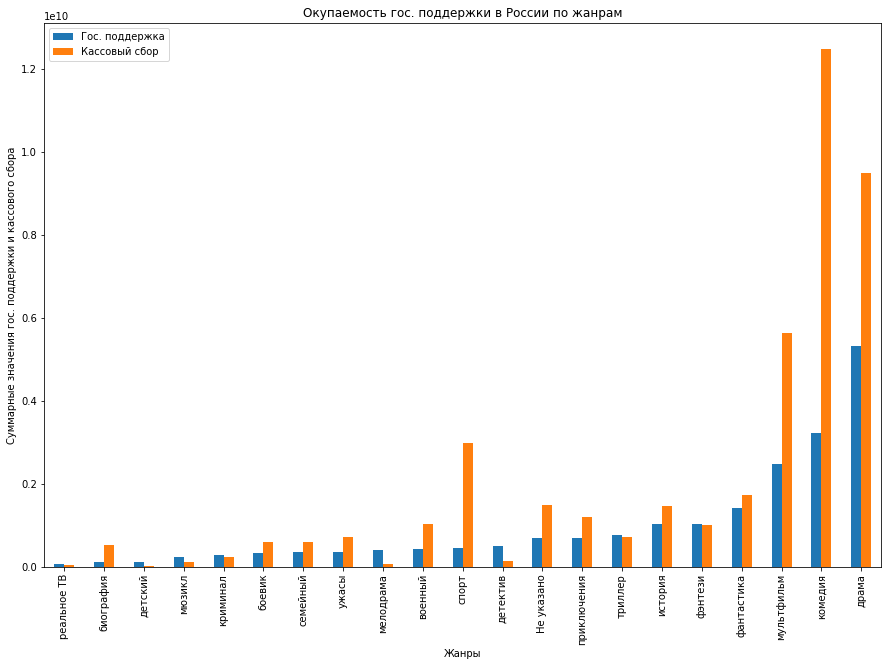

In [132]:
genre_state_support_profitable = state_support_russia.pivot_table(index = 'main_genre', values = ['refundable_support', \
                                                    'nonrefundable_support', 'box_office'],\
                                                                   aggfunc = 'sum')
genre_state_support_profitable ['support'] = genre_state_support_profitable['refundable_support'] + \
genre_state_support_profitable['nonrefundable_support']

genre_state_support_profitable = genre_state_support_profitable.sort_values(by = ['support'])

genre_state_support_profitable.plot(kind = 'bar', y = ['support', 'box_office'],  figsize = (15,10))
plt.xlabel('Жанры')
plt.ylabel('Суммарные значения гос. поддержки и кассового сбора')  
plt.title('Окупаемость гос. поддержки в России по жанрам')
plt.legend(['Гос. поддержка', 'Кассовый сбор'])


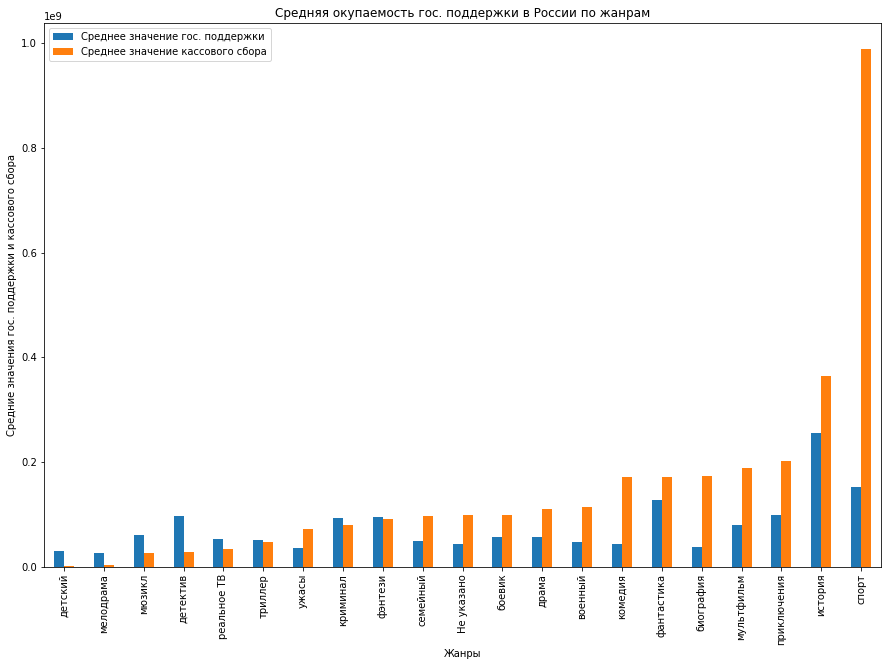

In [133]:
genre_state_support_profitable = state_support_russia.pivot_table(index = 'main_genre', values = ['refundable_support', \
                                                    'nonrefundable_support', 'box_office'],\
                                                                   aggfunc = 'mean')
genre_state_support_profitable ['support'] = genre_state_support_profitable['refundable_support'] + \
genre_state_support_profitable['nonrefundable_support']

genre_state_support_profitable = genre_state_support_profitable.sort_values(by = ['box_office'])

genre_state_support_profitable.plot(kind = 'bar', y = ['support', 'box_office'],  figsize = (15,10))
plt.xlabel('Жанры')
plt.ylabel('Средние значения гос. поддержки и кассового сбора')  
plt.title('Средняя окупаемость гос. поддержки в России по жанрам')
plt.legend(['Среднее значение гос. поддержки', 'Среднее значение кассового сбора'])

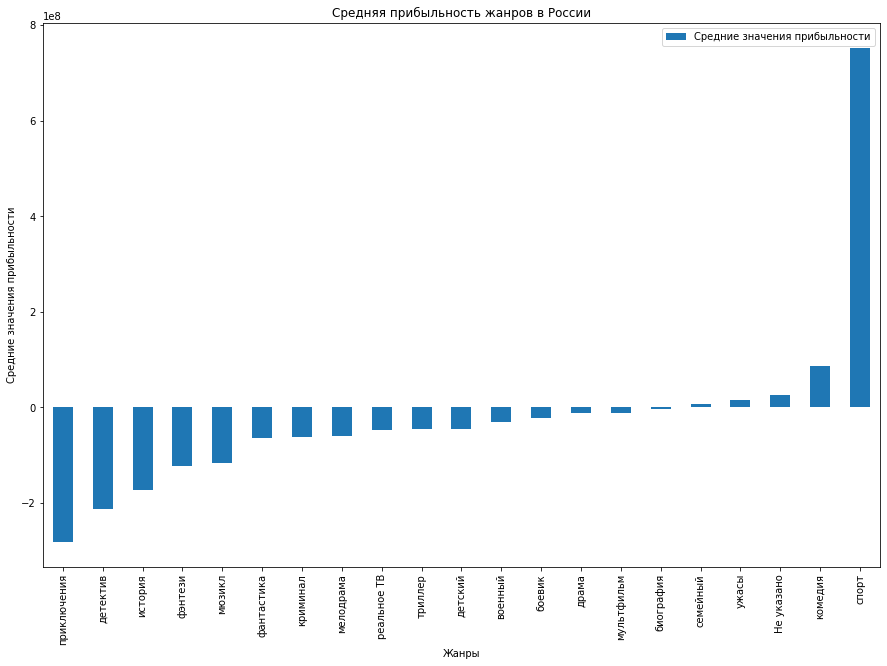

In [134]:
genre_profitable = state_support_russia.pivot_table(index = 'main_genre', values = ['budget', 'box_office'],\
                                                                   aggfunc = 'mean')
genre_profitable ['profit'] = genre_profitable['box_office'] - genre_profitable['budget']

genre_profitable = genre_profitable.sort_values(by = ['profit'])

genre_profitable.plot(kind = 'bar', y = 'profit',  figsize = (15,10))
plt.xlabel('Жанры')
plt.ylabel('Средние значения прибыльности')  
plt.title('Средняя прибыльность жанров в России')
plt.legend(['Средние значения прибыльности'])

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Вывод:**

На данном этапе были проанализированы кинокартины, которые получили государственные средства (на возвратной и/или невозвратной основе) от России. Для иллюстрации данных были построены диаграммы.
    
При анализе таких фильмов по рейтингу, жанрам, государственной поддержке, окупаемосте были получены следующие выводы:
    
 (пояснение: список по лидерству - от лучшего к менее лучшему; список по отставанию - от менее отстающего к более отстающему)

1) наиболее популярные жанры среди российских зрителей - криминал, детский, спорт, биография, детектив;\
2) наименее популярные жанры - реальное ТВ, комедия, семейный, история, ужасы;\
3) жанры фильмов, получающие чаще всех государственных средств - драма, комедия, мультфильм, мелодрама, триллер;\
4) жанры фильмов, получающие реже всех государственных средств - детский, спорт, криминал, биография, реальное ТВ;\
5) чаще всего фильмы в России получают государственные средства на невозвратной основе;\
6) государственные средства на возвратной основе могут вовсе не выдаваться;\
7) лидеры среди жанров по объему полученных государственных средств - драма, комедия, мультфильм, фантастика, фентези;\
8) жанры, получающие наименьший объем государственных средств - криминал, мюзикл, биография, детский, реальное ТВ;\
9) жанры, всреднем окупающие государственную поддержку - спорт, история, приключения, мультфильм, биография;\
10) жанры, всреднем не окупающие государственную поддержку - реальное ТВ, детектив, мюзикл, мелодрама, десткий;\
11) наиболее прибыльные жанры - спорт, комедия, ужасы, семейный, биография;\
12) наиболее убыточные жанры - мюзикл, фентези, история, детектив, приключения. 

### Шаг 5. Напишите общий вывод

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

В данном исследовании необходимо было изучить рынок российского кинопроката и выявить текущие тренды. Основная задача для анализа - изучить насколько фильмы, получившие государственную поддержку интересны зрителю. 

В качестве материала для анализа были получены два файла, содержащих данные, опубликованные на портале открытых данных Министерства культуры, а также информацию с сайта КиноПоиск. Полный список данных следующий:: 

Таблица mkrf_movies:
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Таблица mkrf_shows:
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

Работа над данным проектом была разделена на 4 шага:
1) изучение общей информации;\
2) предобработка данных;\
3) добавление новых параметров;\
4) исследовательский анализ данных.
    
    
При изучении общей информации удалось:
    
* открыть файлы с данными, затем они были соединены в один датасет 'data_full'; далее была изучена общая информация по нему;

* отсечь в столбце 'show_start_date' время премьеры фильма, так как оно не несет в себе нужной для исследования информации, а лишь только утяжеляет прочтение хранящихся там данных;
    
* обнаружить, что столбцы 'puNumber' и 'ratings' - имеют неправильный тип данных, что может отразиться на будущих результатах;
    
* при анализе заголовков столбцов не было выявлено никаких замечаний, которые должны подвергнуться дополнительному анализу;

* обнаружить, что в 11 (одинадцати) следующих столбцах: 'film_studio', 'production_country', 'director', 'producer', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source', 'ratings', 'genres', 'box_office' - присутсвуют пропущенные значения, они будут также более подробно изучены и устранены по возможности на следующем этапе работы. 
    

При предобработке данных удалось:
    
* измененить типы данных в 2 (двух) столбцах; данные изменения обусловлены корректностью анализа в последующих шагах работы, так как неправильно указанный тип данных может повлиять на выполнение кода в целом или на правдивость его результата:\
1) столбец 'show_start_date' с датой премьеры фильма - с object (тип данных для текста) на datetime64[ns] (тип данных для даты);\
2) столбец 'ratings' с рейтингом фильма на КиноПоиске - с object (тип данных для текста) на float64 (тип данных для дробных)
       
    
* обнаружить пропуски в 12 (двенадцати) столбцах; причины появления пропусков в категориальных данных могут быть объяснены как ошибкой сервиса или его некорректной работой, ошибками при сборе данных, а также специальным пропуском данного поля, такие пропуски были заменены на фразу 'Не указано'; 
    
  пропущенные значения почти во всех количественных данных, в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'box_office', и причина их возникновения - большинство данных могли быть не указаны из-за отсутствия финансирования со стороны России таких кинолент, из чего следует, что заменить их на среднее или другие значения невозможно и не несет в себе выгоды для расчетов по данному проекту;

  пропущенные значения в столбце 'ratings' не были заменены ни на какое другое значение; решение было принято по причине того, что данные пропуски появились в результате какой-либо автоматической ошибки или упущении при заполнении данных, а так как настоящая природа их возникновения не может быть выявлена, следует, что заменить их на среднее или другие значения невозможно, более того, рейтинг того или иного фильма нельзя предугадать, так как он зависет от предпочтения людей;
    
  пропуски в столбцах 'refundable_support' и 'nonrefundable_support' будут обработаны повторно по отношению к столбцу 'budget', так как, согласно инструкциям к изначальным данным, в последнем указывается информация, если у фильма была поддержка от государства. Таким образом, будут востановлены данные там где это возможно для российских кинолент, получивших заемные средства от государства;
    
    
* выявить неявные дубликаты ('production_country' различные написания страны, как 'Юж. Корея' и 'Южная Корея') и лишние пробелы в начале или в конце строки, которые были устранены;
    
  обнаружить в столбце 'puNumber' дубликаты номеров удостоверений, но, так как для работы над проектом такие номера не играют важной роли, было принято решение оставить их без изменений;
    
  в столбцах 'film_studio', 'type' и 'production_country' обнаружить в написани илишние пробелы в начале или в конце строки, которые были устранены; остальные данные были оставлены без именений в виду отсутсвия замечаний к ним;
    
  выявить основную проблему категориальных данных - их многочисленность в каждом отдельном значении, по причине чего сложно выделить какую-либо основную категорию или линию для отслеживания, то есть усложняется их прочтение и интерпретация;
    
    
* при рассмотрении числовых значений выявить, что:
    
    - в столбцах 'refundable_support', 'nonrefundable_support' и 'budget' большая часть данных - это пропущенные значения, так 96% всех данных в каждом столбце - это отсутсвующие значения; ссылаясь на изначальную информацию и проведя анализ, можно сделать вывод, что "отсутсвие" данных в одном из столбцов или в обоих 'refundable_support' и 'nonrefundable_support' - показатель того, что возвратные и/или невозвратные государственные средства со стороны России не были выделены на создание соответсвующих кинокартин; напротив, если в данных стоит 0 (ноль) - это показатель того, что только один из видов государственных средств не был выделен (в соответствии нахождению 0 (нуля); 
    
    - также при нахождении 0 (нуля) в столбце 'budget' говорит о том, что таким фильмам могли выдаваться государственные средства со стороны России, но по неизвестной причине бюджет киноленты не указан; стоит отметить, что согласно инструкциям по полученным изначально данным, если значение в графе 'budget' не отсутсвует, то это показатель того, что Россия выделяла финансирование соответсвующему фильму; для продолжения работы над проектом стоит рассмотреть столбец 'budget' повторно на нахождение строк, в которых бюджет 
равен 0 (нулю) при присутсвующих значениях возвратных и невозвратных средств, и по возможности и целесообразности заменить такие данные на соответствующее значение;
    
    -'ratings' и 'box_office': были обнаружены пропущенные значения, но уже в гораздо меньшем количестве (13% и 58% соотвтсвенно);       замена данных показателей на медианное или среднее значение ставится под вопрос: данные по рейтингу и сборам слишком зависят от факторов, не представленных в датасете, многие из которых касаются клиентов; так, для более точного результата рекомендуется не менять данные в столбцах на какие-либо значения.
    
    
* расчитать часть, которую занимает сумма объём возвратных и невозвратных средств государственной поддержки от всего бюджета фильма по каждой отдельной стороке, затем, для более надежных результатов было найдено медианное значение такой части, которое равно 61%. 
    
  просмотреть инфорация по фильмам, снятым частично или полностью в России, и в бюджете у которых значился 0 (ноль), несмотря на то, что были указаны выделенные объемы государственных средств; для каждого из получившихся 17 фильмов, найти предположительные объемы бюджета, основываясь на сумме соответсвующих возвратных и невозвратных гос. средств и ее медианной части от всего бюджета фильма.
    
  таким образом, для дальнейшей работы получить 332 строки (информаций по фильмам), на основе которых будет проходить анализ основной задачи проекта.
    
    
На третьем шаге, для получения наиболее достоверных результатов работы, в изначальный датасет были добавлены следующие параметры:
1) 'show_start_year' - год проката;\
2) 'main_director' - имя и фамилия главного режиссёра;\
3) 'main_genre' - основной жанр фильма;\
4) 'state_support_part' - долю государственная поддержки от общего бюджета фильма.
   
    
На последнем, четвертом, шаге работы над проектом был проведен исследовательский анализ данных и получены следующие выводы, предназначенные для ответа на поставленную задачу изначально. Во-первых, было проанализировано количество фильмов, выходивших в прокат, по каждому году. При анализе доли фильмов, у которых известна информация о прокате в кинотеатрах (указан кассовый сбор), наиболее полным по данным является 2017 год, так у него доля кассовых сборов по отношению к полученным прокатным удостоверениям равна 0.7, что является наивысшим показателем. Сделать однозначный вывод, что именно год влияет на число выходов фильмов нельзя, так как последнее зависит во многом от числа картин снятых в каждом коду по миру. Более того, в данном датасете содержится лишь информация касательно Российского рынка кинопроката, когда как он ограничивается многими факторам, в том числе цензурой. Таким образом, по годам можно лишь отследить количество фильмов постфактум, когда как выводы о причинах конкретных чисел стоит искать в ограничениях по закупкам лицензий на киноленты, при этом учитывая различные политические и экономические факторы, как например санкции.
    
Во-вторых, было проанализировано как менялась динамика кассовых сборов проката по годам. Так, хорошо виден рост в кассовых сборах, который начался резким скачком в 2014 году и продолжался до 2019 года, характеризуясь значительной однородностью, то есть рост или спад были незначительными. Данные за 2010 - 2013 года характеризуются малым уровнем кассовых сборов относительно описанного ранее периода. Таким образом, для большей иллюстрации разрыва между показателями, были расчитаны минимальное и максимальное значения. Минимальный сбор зафиксирован в 2010 году - 2428654.0, а максимальный в 2018 - 4.966840e+10. Такой резкий разрыв в показателях объясняется введением 1 июля 2014 года в России обязательства на получение прокатного, таким образом, после того момента статистика пополнилась данными, которые ранее оставались бы неучетнными из-за отсутсвия получения гос. разрешения на показ фильмов. Однако, стоит еще раз отметить, что показатель года - это скорее название группы для различных факторов, влиящих на кассовые сборы. Так, резкий скачек в кассовых сборах может являться знаком успешных рекламных компаний многих кинолент.
    
В-третьих, были расчитаны проанализированы средняя и медианная сумму сборов для каждого года. Так, динамика роста кассовых сборах как по медианному, так и по среднему значению, к 2019 году характеризуется спадом обоих показателей. Стоит также отметить, что кривая среднего (синяя) находится намного выше и имеет более "гористый" вид с более явными спадами и высотами, чем кривая медианного (оранжевая), это обосновывается тем фактом, что на последнюю меньше оказывают влияния какие-либо минимально высокие или низкие показатели, из-за чего стоит в большей мере ориентироваться на нее.

В-четвертых, было проанализировано влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Были проанализированы показатели сумм кассовых сборов по каждому году и возрастной категории, а также их средние и медианные значения для большей полноты анализа. 
    
Так, проанализировав суммы кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам является группа "«0+» - для любой зрительской аудитории", так сумма сборов имеет направление на спад к 2019 году. Самой кассовой можно считать группу "«16+» - для детей старше 16 лет", однако она имеет тенденцию к спаду к 2019 году. Стоит отметить, что в 2019 году группы "«6+» - для детей старше 6 лет", "«12+» - для детей старше 12 лет" и "«16+» - для детей старше 16 лет" находятся на одной отметки (или на очень схожей) по кассовым сборам. Группа "«18+» - запрещено для детей" к 2019 году начала набирать обороты. 
  
Проанализировав средние значения кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам также является группа "«0+» - для любой зрительской аудитории", так средние значения сборов имеет близкие к нулю показатели относительно других категорий, однако, 2017 год для данной категории характеризуется резким ростом средних сборов, после чего характеризуется резким спадом вплоть до 2019 года. Самой кассовой по среднему значений сборов за весь период можно считать группу "«12+» - для детей старше 12 лет": она не обладает самыми высокими показателями, однако на протяжении 5 лет сохраняла умеренные колебания уровня средних сборов без резких скачков. Стоит отметить, что в 2017 году группы "«0+» - для любой зрительской аудитории", "«6+» - для детей старше 6 лет" и "«16+» - для детей старше 16 лет" имеет пик в показателях среднего по сборам. Так, группа "«6+» - для детей старше 6 лет" хоть и обладает в 2017 году наиболее высоким средним значением по сборам, однако, в последущие года характеризуется спадом. 

Проанализировав медианные значения кассовых сборов за 2015-2019 года по возрастной группе, можно сделать вывод, что самая непопулярная по сборам также является все та же группа "«0+» - для любой зрительской аудитории". Напротив, самой кассовой по медианному значению сборов за весь период можно считать группу "«6+» - для детей старше 6 лет": она характеризуется самыми большими колебаниями, в том чсиле и ростом, по сравнению с остальными группами. Стоит отметить, что в 2017 году группы все гурппы имеют пик в показателях медианного значения по сборам.

Таким образом, итогами анализа данных по кассовым сборам возрастных категорий фильмов в России за период 2015-2019 года можно считать следующее:
    
1) самой низкой по показателям за весь период является группа "«0+» - для любой зрительской аудитории";

2) самой кассовой по показателям за весь период является группа - "«6+» - для детей старше 6 лет";
    
3) самым кассовым является 2017 год (согласно показателям суммы сборов), в котором самая кассовая категория -   "«16+» - для детей старше 16 лет".
    
Стоит также отметить, что окончательные выводы по пунктам №1 и №2 принимались на основе медианного значения, так как оно более правдаподобно отражает ситуацию, не подвергаясь влиянию аномальных значений.
    
      Подтверждение в интернет-источниках касательно 2017 года:
    
    "...2017-й стал лучшим за все время современного отечественного кинопроката. По данным «Бюллетеня кинопрокатчика», в кинотеатры было выпущено 505 картин, и их общие сборы в России (без учета стран СНГ) за год составили 53,8 млрд рублей (или $921 млн). В рублевом эквиваленте это на 9,7% больше, чем было годом ранее, а в долларовом – больше сразу на 26,5%. За год в кинотеатрах было продано 214,7 млн кинобилетов, что также превышает показатели прошлого года на 10,3%.... 
 
    "...Примечательно, что рост кассы по иностранным картинам оказался незначительным – всего +1,2% по кассе и +0,7% по посещаемости. В то же время российское кино выросло сразу на 49,1% и 53,0% соответственно...." 
[Источник](https://www.kinometro.ru/news/show/name/kinoprokat_2017_summary_6879)
 
 
     "...В Фонде полагают, что столь серьезную кассу российскому кино сделали "Викинг", "Притяжение", "Время первых", "Салют-7", "Большой", "Гоголь. Начало", "Аритмия" - от космических саг и исторического эпоса до психологической драмы...."
[Источник](https://rg.ru/2017/10/23/2017-god-stal-rekordnym-dlia-rossijskogo-kino-po-sboram-i-poseshchaemosti.html)
    
    
На заключительном этапе исследовательского анализа были проанализированы кинокартины, которые получили государственные средства (на возвратной и/или невозвратной основе) от России. Стоит отметить, что имеются ввиду отечественные киноленты.
    
При анализе таких фильмов по рейтингу, жанрам, государственной поддержке, окупаемосте были получены следующие выводы:
    
 (пояснение: список по лидерству - от лучшего к менее лучшему; список по отставанию - от менее отстающего к более отстающему)

1) наиболее популярные жанры среди российских зрителей - криминал, детский, спорт, биография, детектив;\
2) наименее популярные жанры - реальное ТВ, комедия, семейный, история, ужасы;\
3) жанры фильмов, получающие чаще всех государственных средств - драма, комедия, мультфильм, мелодрама, триллер;\
4) жанры фильмов, получающие реже всех государственных средств - детский, спорт, криминал, биография, реальное ТВ;\
5) чаще всего фильмы в России получают государственные средства на невозвратной основе;\
6) государственные средства на возвратной основе могут вовсе не выдаваться;\
7) лидеры среди жанров по объему полученных государственных средств - драма, комедия, мультфильм, фантастика, фентези;\
8) жанры, получающие наименьший объем государственных средств - криминал, мюзикл, биография, детский, реальное ТВ;\
9) жанры, всреднем окупающие государственную поддержку - спорт, история, приключения, мультфильм, биография;\
10) жанры, всреднем не окупающие государственную поддержку - реальное ТВ, детектив, мюзикл, мелодрама, детский;\
11) наиболее прибыльные жанры - спорт, комедия, ужасы, семейный, биография;\
12) наиболее убыточные жанры - мюзикл, фентези, история, детектив, приключения.    
    
Таким образом, на данном этапе для ответа на задачу проекта, можно просуммировать, что в России чаще всего на производство кинолент чаще выдаются государственные средства на невозвратной основе, при этом средства на возратной основе могут вообще не выделяться. Важным фактором является то, что государственную поддержку получают фильмы, чей жанр не пользуется большой популярностью у зрителей, такие как комедия, а на оборот: реже всего спонсируются фильмы, чей жанр имеет высокий рейтинг, среди них - детский, криминал и биография. Также стоит отметить: последние не только по числу поддержки, но и по объему выделяемых средств находятся вне приоритета государства, то есть, даже если жанр криминал получает государственное спонсирование - его сумма будет кратно ниже, например, чем у жанра комедии. 
  
Важным фактором для любой комерческой индустрии является окупаемость вложенных средств и прибыльность. Так, проанализировав окупаемость государственных вложений в производство кинокартин, можно сделать вывод, что некоторые жанры, как например, мелодрамы, на которые часто выделяются гос. средства, не окупаются. В то время как, киноленты жанров, на которые редко выделяются гос. средства, окупают их. Однако, стоит отметить, что есть жанры, которые хоть и имеют небольшой рейтинг среди зрителей, но приносят большую прибыль, например, коммедия. Также данный жанр входит в лидеры по числу и объему полученной государственной помощи, что является хорошим признаком для продолжения вложений в него, однако, его один из наиболее низких рейтингов и отсутсвие в лидерах по окупаемости гос.средств свидетельствуют о том, что при выходе комедийного средства может создаваться ажиотаж, но такое случается не всегда, а после просмотра картины зрители чаще всего оценять его на невысокий уровень.

В заключении, основываясь на полученных данных, можно выделить следующие рекомендации по напрваленности и эффективности гос.вложений:

1) рассмотреть отказ от финансирования фильмов с жанром мелодрама;\
2) анализировать киноленты с жанром комедия более внимательно на этапе рассмотрения заявок и в этом вопросе опираться на информацию от зрителей - проводить больших анализ аспектов, которые не удовлетворяют запросы клиентов;\
3) рассмотреть больший пакет гос. финансирования фильмам жанров спорт, криминал и биография;\
4) рассмотреть возможность большего применения средств гос.поддержки фильмам на возвратной основе.